#  <centre> <h1><i> Assignment 4 - Data Cleaning, Feature Selection, Modeling and Interpretability </i> </h1> </centre>

## Abstract

This abstract synthesizes findings from three interconnected assignments within the domain of machine learning, emphasizing the importance of data preparation, predictive modeling, and interpretability. Initially, the focus is on Machine Learning Data Cleaning and Feature Selection, establishing the groundwork for efficient and effective ML modeling by highlighting the necessity to refine data and identify key features, thereby enhancing model accuracy and efficiency.

The exploration advances by applying these principles to the Titanic dataset using the H2O.ai AutoML library, aiming to predict passenger survival. This segment underscores the utility of AutoML in streamlining the exploration of diverse machine learning models, facilitating a deeper understanding of survival determinants through automated model selection and hyperparameter tuning.

Building on this, the last task endeavors to construct regression and classification models for a chosen dataset, employing H2O AutoML followed by a comprehensive SHAP (SHapley Additive exPlanations) analysis. This analysis quantifies the contribution of each feature to the prediction, offering insights into model interpretability and enabling a comparison with other interpretability frameworks.

Collectively, these tasks illustrate the transformative potential of machine learning in data analysis, the critical role of meticulous data preparation, the benefits of AutoML in simplifying model development, and the significance of interpretability tools like SHAP in understanding and trusting ML predictions. Through this cohesive approach, we not only achieve heightened predictive accuracy but also gain a richer understanding of the data and the factors influencing model outcomes.

#  <centre> <u> **ML Data Cleaning and Feature Selection** </u> </centre>

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [159]:
url_train = 'https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/Titanic/train.csv'
df_train = pd.read_csv(url_train)


In [160]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [161]:
url_test = 'https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/Titanic/test.csv'

In [162]:
df_test = pd.read_csv (url_test)

In [163]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [164]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [165]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#Likely distributions of the numeric variables

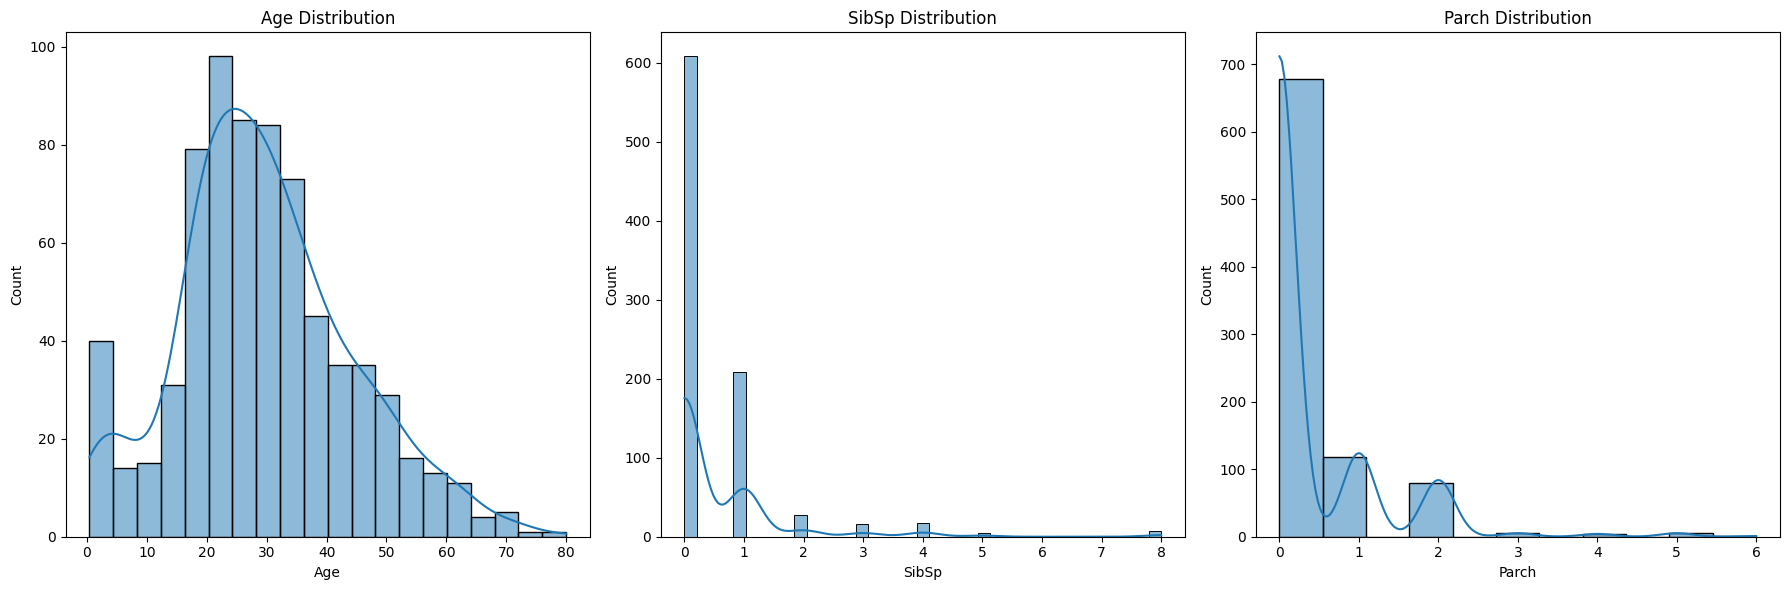

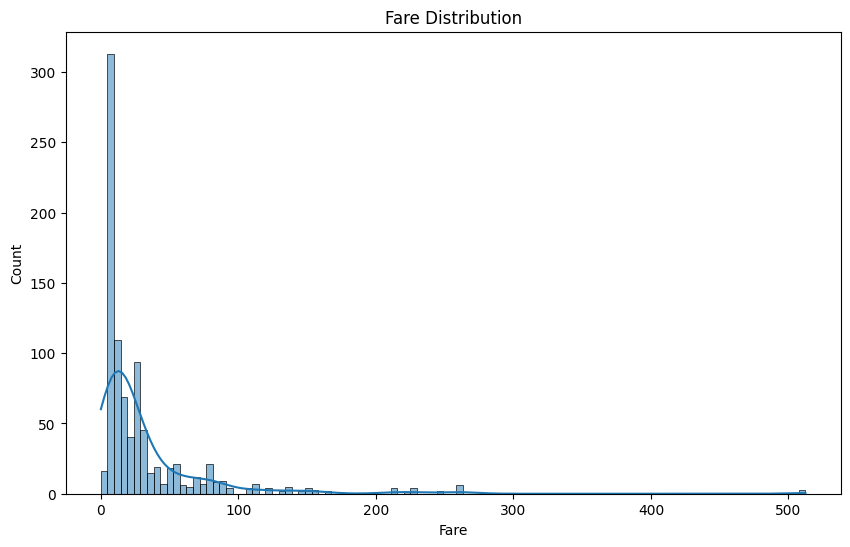

In [166]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age Distribution
sns.histplot(data=df_train, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# SibSp Distribution
sns.histplot(data=df_train, x='SibSp', kde=True, ax=axes[1])
axes[1].set_title('SibSp Distribution')

# Parch Distribution
sns.histplot(data=df_train, x='Parch', kde=True, ax=axes[2])
axes[2].set_title('Parch Distribution')

plt.tight_layout()
plt.show()

# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Fare', kde=True)
plt.title('Fare Distribution')
plt.show()

* Age Distribution: Likely to be normally distributed with some outliers towards older ages.

* SibSp Distribution: Likely to have a skewed distribution with a majority of values being 0 (indicating no siblings/spouses or parents/children onboard).

* Parch Distribution: Likely to have a skewed distribution with a majority of values being 0 (indicating no siblings/spouses or parents/children onboard).

* Fare Distribution: Likely to have a right-skewed distribution with some high values indicating expensive tickets.

In [167]:

def missing_data_summary(df):
    # Find the count of missing values in each column
    missing_count = df.isnull().sum()

    # Find the total number of rows
    total_rows = len(df)

    # Find the percentage of missing values in each column
    missing_percentage = (missing_count / total_rows) * 100

    # Combine count and percentage into a DataFrame
    missing_data_summary = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})

    return missing_data_summary

In [168]:
missing_data_summary(df_train)

Missing Count  Missing Percentage
PassengerId              0            0.000000
Survived                 0            0.000000
Pclass                   0            0.000000
Name                     0            0.000000
Sex                      0            0.000000
Age                    177           19.865320
SibSp                    0            0.000000
Parch                    0            0.000000
Ticket                   0            0.000000
Fare                     0            0.000000
Cabin                  687           77.104377
Embarked                 2            0.224467

In [169]:
missing_data_summary(df_test)

Missing Count  Missing Percentage
PassengerId              0            0.000000
Pclass                   0            0.000000
Name                     0            0.000000
Sex                      0            0.000000
Age                     86           20.574163
SibSp                    0            0.000000
Parch                    0            0.000000
Ticket                   0            0.000000
Fare                     1            0.239234
Cabin                  327           78.229665
Embarked                 0            0.000000

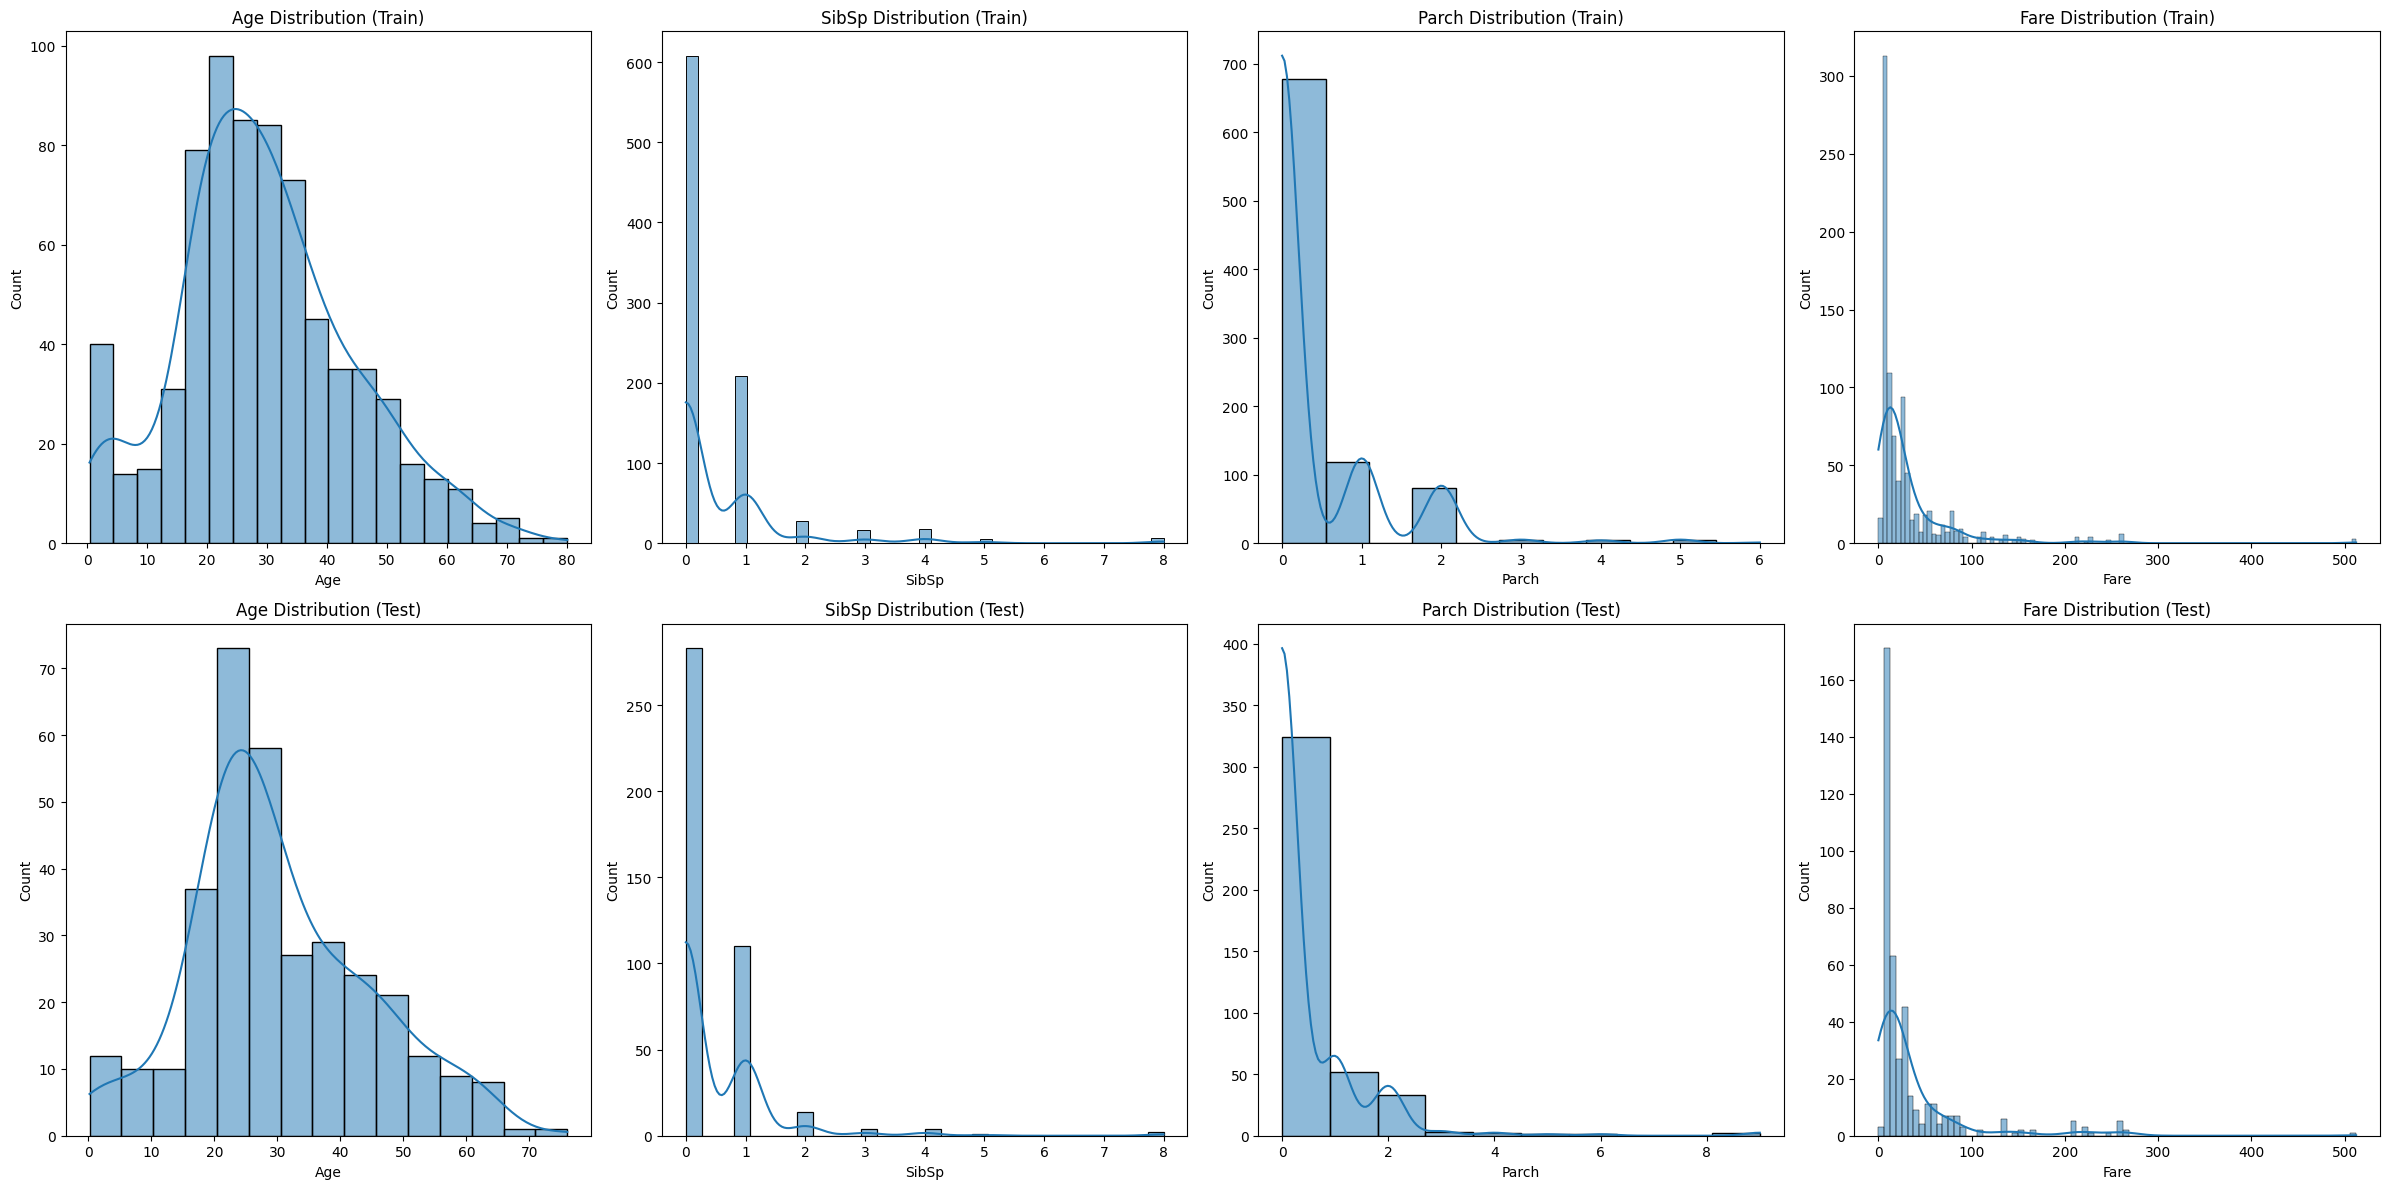

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Age Distribution for df_train
sns.histplot(data=df_train, x='Age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution (Train)')

# SibSp Distribution for df_train
sns.histplot(data=df_train, x='SibSp', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('SibSp Distribution (Train)')

# Parch Distribution for df_train
sns.histplot(data=df_train, x='Parch', kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Parch Distribution (Train)')

# Fare Distribution for df_train
sns.histplot(data=df_train, x='Fare', kde=True, ax=axes[0, 3])
axes[0, 3].set_title('Fare Distribution (Train)')

# Age Distribution for df_test
sns.histplot(data=df_test, x='Age', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution (Test)')

# SibSp Distribution for df_test
sns.histplot(data=df_test, x='SibSp', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('SibSp Distribution (Test)')

# Parch Distribution for df_test
sns.histplot(data=df_test, x='Parch', kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Parch Distribution (Test)')

# Fare Distribution for df_test
sns.histplot(data=df_test, x='Fare', kde=True, ax=axes[1, 3])
axes[1, 3].set_title('Fare Distribution (Test)')

plt.tight_layout()
plt.show()


Train and test has similar data, where test does not contain target feature

<ipython-input-171-9f14e4b23260>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


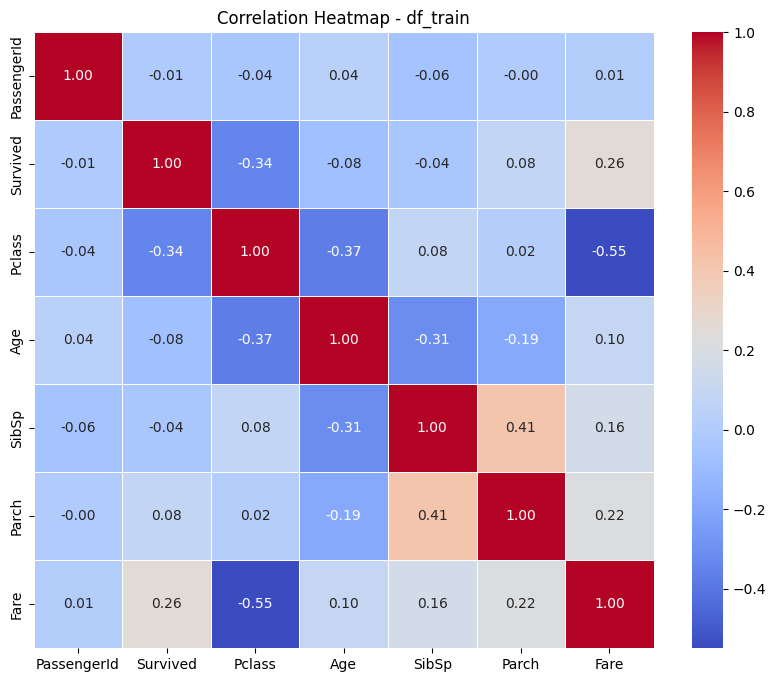

In [171]:
correlation_matrix = df_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - df_train')
plt.show()

In [172]:
#checking for missing data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Age', 'Cabin', 'Embarked' has missing values from train data



In [173]:
#checking for missing data
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

'Age', 'Cabin', 'Fare' has missing values from test data

In [174]:
def med_impute_nan(df_train):

    med_impute_df_train = df_train.copy()  # Copy of dataframe for imputation
    med_impute_df_train["Age"] = med_impute_df_train["Age"].fillna(med_impute_df_train["Age"].median())
    return med_impute_df_train

In [175]:
med_impute_df_train = med_impute_nan(df_train)
med_impute_df_test = med_impute_nan(df_test)

In [176]:
med_impute_df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [177]:
med_impute_df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [178]:
med_impute_df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [179]:
# checking standard deviation
print(df_train['Age'].std())
print(med_impute_df_train['Age'].std())

14.526497332334042
13.019696550973201


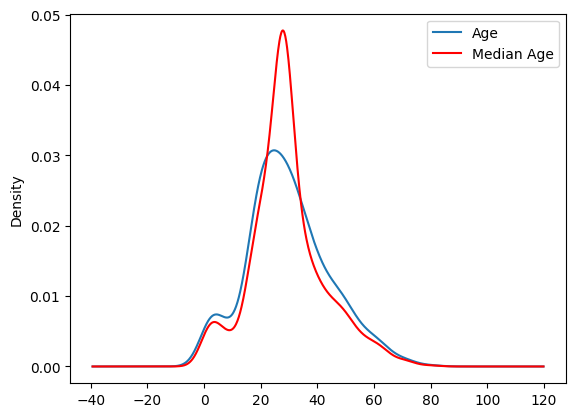

In [180]:
# plotting the variance difference
fig = plt.figure()
ax = fig.add_subplot(111)
df_train['Age'].plot(kind='kde', ax=ax)
med_impute_df_train['Age'].plot(kind='kde', label='Median Age', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [181]:
def rand_impute_nan(df_train):

    rand_impute_df_train = df_train.copy()  # Copy of dataframe for imputation
    # It will have the random sample to fill the nan
    random_sample = rand_impute_df_train["Age"].dropna().sample(rand_impute_df_train["Age"].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = rand_impute_df_train[rand_impute_df_train["Age"].isnull()].index
    rand_impute_df_train.loc[rand_impute_df_train["Age"].isnull(),"Age"] = random_sample
    return rand_impute_df_train

In [182]:
rand_impute_df_train = rand_impute_nan(df_train)
rand_impute_df_test = rand_impute_nan(df_test)

In [183]:
rand_impute_df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [184]:
rand_impute_df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [185]:
rand_impute_df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [186]:
# checking standard deviation
print(df_train['Age'].std())
print(rand_impute_df_train['Age'].std())

14.526497332334042
14.56365408956869


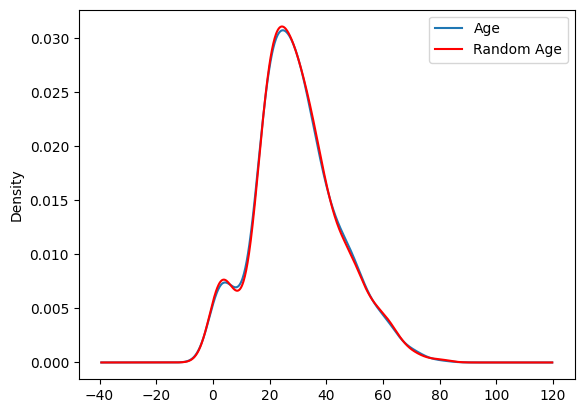

In [187]:
# plotting the variance difference
fig = plt.figure()
ax = fig.add_subplot(111)
df_train['Age'].plot(kind='kde', ax=ax)
rand_impute_df_train['Age'].plot(kind='kde', label='Random Age', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [188]:
df2 = rand_impute_df_train
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [189]:
df2.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [190]:
emabark = df2['Embarked'].dropna()

In [191]:
df2[df2['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [192]:
df2['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [193]:
df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [194]:
df2['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [195]:
df2['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [196]:
df2['Cabin'].fillna(df2['Cabin'].mode()[0], inplace=True)

In [197]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [198]:
df3 = rand_impute_df_test
df3.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [199]:
int(df3['Fare'].mean())

35

In [200]:
df3['Fare'] = df3['Fare'].fillna(np.mean(df2['Fare']))
df3.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [201]:
df3['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [202]:
df3['Cabin'].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [203]:
df3['Cabin'].fillna(df3['Cabin'].mode()[0], inplace=True)
df3.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [204]:
df2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  B96 B98        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  B96 B98        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  B96 B98        S

In [205]:
df3.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare            Cabin Embarked  
0  34.5      0      0   330911   7.8292  B57 B59 B63 B66        Q  
1  47.0      1      0   363272   7.0000  B57 B59 B63 B66        S  
2  62.0      0      0   240276   9.6875  B57 B59 B63 B66        Q  
3  27.0      0      0   315154   8.6625  B57 B59 B63 B66        S  
4  22.0      1      1  3101298  12.2875  B57 B59 B63 B66        S

In [206]:
df2['Sex'] = df2['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

def fun(x):

if x == 'male': return 1
else: return 0

In [207]:
df2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    Cabin Embarked  
0         A/5 21171   7.2500  B96 B98        S  
1          PC 17599  71.2833      C85        C  
2  STON/O2. 3101282   7.9250  B96 B98        S  
3            113803  53.1000     C123        S  
4            373450   8.0500  B96 B98        S

In [208]:
df3['Sex'] = df3['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df3['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [209]:
df3.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare            Cabin Embarked  
0  34.5      0      0   330911   7.8292  B57 B59 B63 B66        Q  
1  47.0      1      0   363272   7.0000  B57 B59 B63 B66        S  
2  62.0      0      0   240276   9.6875  B57 B59 B63 B66        Q  
3  27.0      0      0   315154   8.6625  B57 B59 B63 B66        S  
4  22.0      1      1  3101298  12.2875  B57 B59 B63 B66        S

In [210]:
df2.drop(columns=['Name'], inplace=True)

In [211]:
df2.drop(columns=['Ticket'], inplace=True)

In [212]:
df2.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare    Cabin  \
0            1         0       3    1  22.0      1      0   7.2500  B96 B98   
1            2         1       1    0  38.0      1      0  71.2833      C85   
2            3         1       3    0  26.0      0      0   7.9250  B96 B98   
3            4         1       1    0  35.0      1      0  53.1000     C123   
4            5         0       3    1  35.0      0      0   8.0500  B96 B98   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [213]:
df3.drop(columns=['Name', 'Ticket'], inplace=True)

In [214]:
df3.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare            Cabin  \
0          892       3    1  34.5      0      0   7.8292  B57 B59 B63 B66   
1          893       3    0  47.0      1      0   7.0000  B57 B59 B63 B66   
2          894       2    1  62.0      0      0   9.6875  B57 B59 B63 B66   
3          895       3    1  27.0      0      0   8.6625  B57 B59 B63 B66   
4          896       3    0  22.0      1      1  12.2875  B57 B59 B63 B66   

  Embarked  
0        Q  
1        S  
2        Q  
3        S  
4        S

In [215]:
print(df2["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [216]:
from sklearn.preprocessing import LabelEncoder
cols = ['Embarked']
le = LabelEncoder()

for col in cols:
    df2[col] = le.fit_transform(df2[col])
df2.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare    Cabin  \
0            1         0       3    1  22.0      1      0   7.2500  B96 B98   
1            2         1       1    0  38.0      1      0  71.2833      C85   
2            3         1       3    0  26.0      0      0   7.9250  B96 B98   
3            4         1       1    0  35.0      1      0  53.1000     C123   
4            5         0       3    1  35.0      0      0   8.0500  B96 B98   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2

In [217]:
print(df3["Embarked"].value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [218]:
from sklearn.preprocessing import LabelEncoder
cols = ['Embarked']
le = LabelEncoder()

for col in cols:
    df3[col] = le.fit_transform(df3[col])
df3.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare            Cabin  \
0          892       3    1  34.5      0      0   7.8292  B57 B59 B63 B66   
1          893       3    0  47.0      1      0   7.0000  B57 B59 B63 B66   
2          894       2    1  62.0      0      0   9.6875  B57 B59 B63 B66   
3          895       3    1  27.0      0      0   8.6625  B57 B59 B63 B66   
4          896       3    0  22.0      1      1  12.2875  B57 B59 B63 B66   

   Embarked  
0         1  
1         2  
2         1  
3         2  
4         2

In [219]:
df2 = df2.drop(columns=['Cabin'], axis=1)
df2.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2

In [220]:
# Convert data to DataFrame
df = pd.DataFrame(df2)

# Specify the CSV file name
filename = "titanic.csv"

# Save to CSV
df.to_csv(filename, index=False, encoding='utf-8')

In [221]:
df3 = df3.drop(columns=['Cabin'], axis=1)
df3.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    1  34.5      0      0   7.8292         1
1          893       3    0  47.0      1      0   7.0000         2
2          894       2    1  62.0      0      0   9.6875         1
3          895       3    1  27.0      0      0   8.6625         2
4          896       3    0  22.0      1      1  12.2875         2

In [222]:
# Correlation analysis
correlation_matrix = df2.corr()
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlation with target (Survived):\n", correlation_with_target)

Correlation with target (Survived):
 Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.044463
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


* In this case, 'Sex', 'Pclass', and 'Embarked' have the highest absolute correlation values with 'Survived', suggesting they may be useful for prediction

In [223]:
from sklearn.ensemble import RandomForestClassifier

# Define independent variables (features) and the target variable
X = df2.drop('Survived', axis=1)
y = df2['Survived']

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit RandomForestClassifier
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importances from Random Forest:\n", feature_importances)


Feature importances from Random Forest:
 Sex            0.243415
Fare           0.196580
PassengerId    0.192035
Age            0.175051
Pclass         0.083141
SibSp          0.041371
Parch          0.036020
Embarked       0.032388
dtype: float64


* In this case, 'Sex', 'Fare', 'PassengerId', and 'Age' have higher feature importance values, suggesting they are more influential in predicting survival.

In [224]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k='all')

# Fit selector to the data
selector.fit(X, y)

# Get feature scores
feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print("Univariate feature scores using ANOVA F-test:\n", feature_scores)


Univariate feature scores using ANOVA F-test:
 Sex            372.405724
Pclass         115.031272
Fare            63.030764
Embarked        25.717286
Parch            5.963464
Age              1.760985
SibSp            1.110572
PassengerId      0.022285
dtype: float64


* 'Sex', 'Pclass', 'Fare', and 'Embarked' have higher F-test scores, suggesting they are more relevant in predicting survival.

* Based on the outputs from the three methods, the following predictor variables appear to be most important:

1. 'Sex'
2. 'Pclass'
3. 'Fare'
4. 'Embarked'

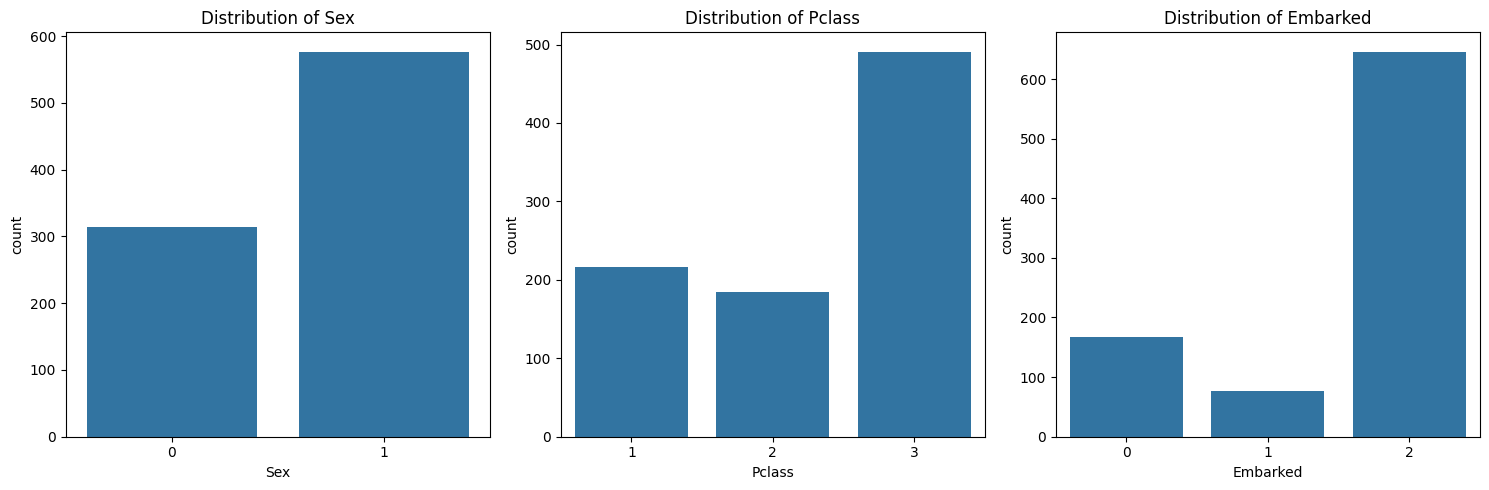

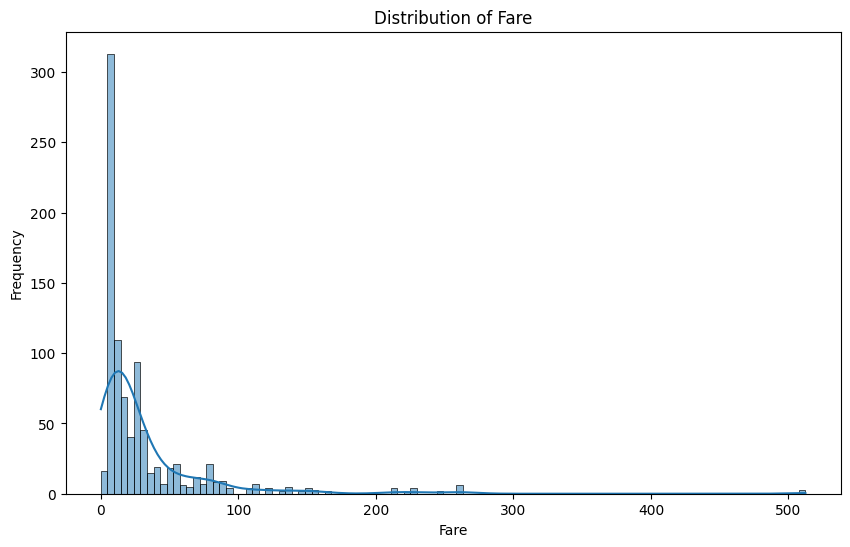

In [225]:
# Plotting categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x='Sex', data=df2, ax=axes[0])
axes[0].set_title('Distribution of Sex')

sns.countplot(x='Pclass', data=df2, ax=axes[1])
axes[1].set_title('Distribution of Pclass')

sns.countplot(x='Embarked', data=df2, ax=axes[2])
axes[2].set_title('Distribution of Embarked')

plt.tight_layout()
plt.show()

# Plotting continuous variable 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df2['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


<Axes: >

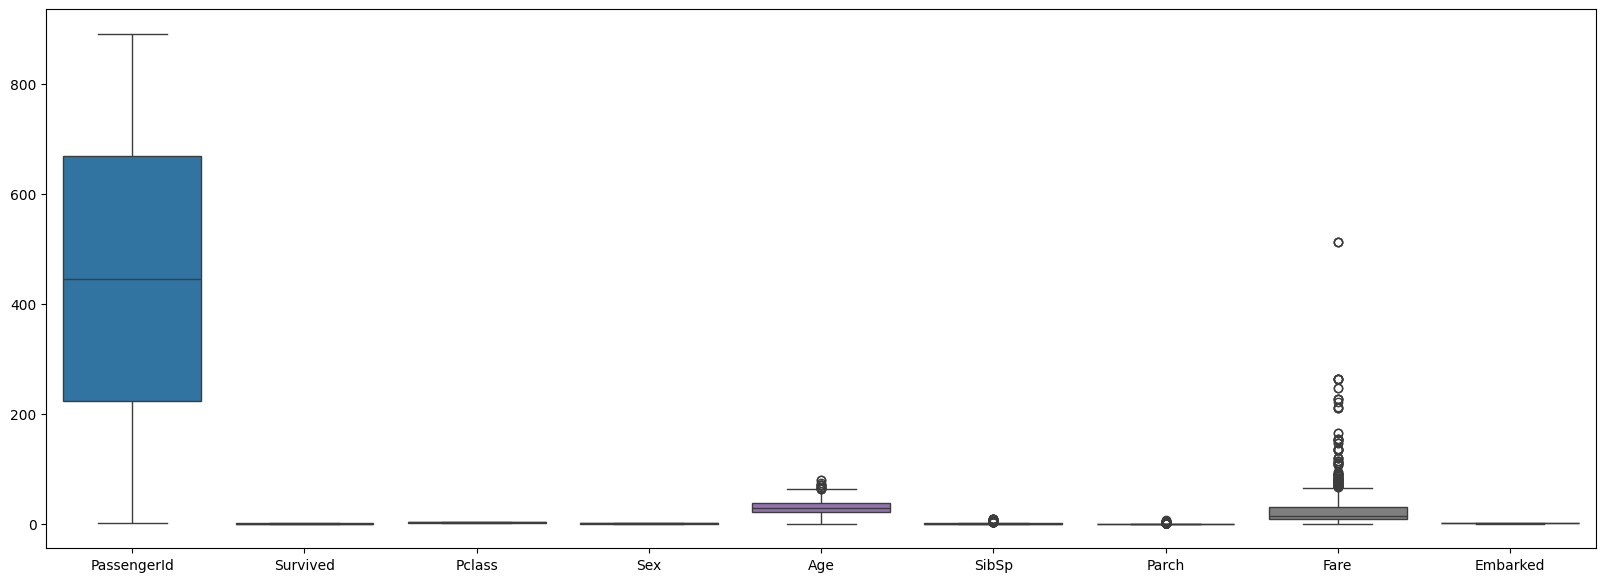

In [226]:
plt.figure(figsize=(20, 7))
sns.boxplot(df2)

#Removing outliers and keeping outliers - (to check does it have any effect on the final predictive model)

In [227]:
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

def remove_outliers(df):  # Function to Remove All outliers
    df_removed_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df_removed_outliers


def feature_scaling(df):  # Function to scale all the features
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_df = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    return scaled_df

In [228]:
# Feature Scaling Training Data with Outliers
df2_scaled = feature_scaling(df2)

# Removing outliers from training data
df2_scaled_nooutlier = remove_outliers(df2_scaled)


In [229]:
df2_scaled_nooutlier

PassengerId  Survived  Pclass  Sex       Age  SibSp     Parch      Fare  \
0       0.000000       0.0     1.0  1.0  0.271174  0.125  0.000000  0.014151   
1       0.001124       1.0     0.0  0.0  0.472229  0.125  0.000000  0.139136   
2       0.002247       1.0     1.0  0.0  0.321438  0.000  0.000000  0.015469   
3       0.003371       1.0     0.0  0.0  0.434531  0.125  0.000000  0.103644   
4       0.004494       0.0     1.0  1.0  0.434531  0.000  0.000000  0.015713   
..           ...       ...     ...  ...       ...    ...       ...       ...   
886     0.995506       0.0     0.5  1.0  0.334004  0.000  0.000000  0.025374   
887     0.996629       1.0     0.0  0.0  0.233476  0.000  0.000000  0.058556   
888     0.997753       0.0     1.0  0.0  0.183212  0.125  0.333333  0.045771   
889     0.998876       1.0     0.0  1.0  0.321438  0.000  0.000000  0.058556   
890     1.000000       0.0     1.0  1.0  0.396833  0.000  0.000000  0.015127   

     Embarked  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0  
..        ...  
886       1.0  
887       1.0  
888       1.0  
889       0.0  
890       0.5  

[824 rows x 9 columns]

In [230]:
# Feature Scaling Testing Data
df3_scaled = feature_scaling(df3)

# Removing outliers from testing data
df3_scaled_nooutlier = remove_outliers(df3_scaled)

In [231]:
df3_scaled_nooutlier

PassengerId  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0       0.000000     1.0  1.0  0.452723  0.000  0.000000  0.015282       0.5
1       0.002398     1.0  0.0  0.617566  0.125  0.000000  0.013663       1.0
2       0.004796     0.5  1.0  0.815377  0.000  0.000000  0.018909       0.5
3       0.007194     1.0  1.0  0.353818  0.000  0.000000  0.016908       1.0
4       0.009592     1.0  0.0  0.287881  0.125  0.111111  0.023984       1.0
..           ...     ...  ...       ...    ...       ...       ...       ...
413     0.990408     1.0  1.0  0.327443  0.000  0.000000  0.015713       1.0
414     0.992806     0.0  0.0  0.512066  0.000  0.000000  0.212559       0.0
415     0.995204     1.0  1.0  0.505473  0.000  0.000000  0.014151       1.0
416     0.997602     1.0  1.0  0.380193  0.000  0.000000  0.015713       1.0
417     1.000000     1.0  1.0  0.512066  0.125  0.111111  0.043640       0.0

[386 rows x 8 columns]

In [232]:
# Correlation analysis
correlation_matrix = df2_scaled_nooutlier.corr()
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlation with target (Survived):\n", correlation_with_target)

Correlation with target (Survived):
 Survived       1.000000
Fare           0.327759
Parch          0.201746
SibSp          0.096271
PassengerId   -0.015787
Age           -0.074233
Embarked      -0.148092
Pclass        -0.314280
Sex           -0.558236
Name: Survived, dtype: float64


In [233]:
df2_scaled_nooutlier.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   824.000000  824.000000  824.000000  824.000000  824.000000   
mean      0.499009    0.387136    0.654126    0.658981    0.370604   
std       0.286643    0.487391    0.413805    0.474340    0.175995   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.252528    0.000000    0.500000    0.000000    0.258608   
50%       0.500562    0.000000    1.000000    1.000000    0.346569   
75%       0.741854    1.000000    1.000000    1.000000    0.472229   
max       1.000000    1.000000    1.000000    1.000000    0.886906   

            SibSp       Parch        Fare    Embarked  
count  824.000000  824.000000  824.000000  824.000000  
mean     0.043538    0.042476    0.050524    0.769417  
std      0.077338    0.094123    0.058187    0.394663  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.015412    0.500000  
50%      0.000000    0.000000    0.025374    1.000000  
75%      0.125000    0.000000    0.053052    1.000000  
max      0.375000    0.333333    0.321798    1.000000

In [234]:
df2_scaled.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean      0.500000    0.383838    0.654321    0.647587    0.367936   
std       0.289162    0.486592    0.418036    0.477990    0.183006   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.250000    0.000000    0.500000    0.000000    0.258608   
50%       0.500000    0.000000    1.000000    1.000000    0.346569   
75%       0.750000    1.000000    1.000000    1.000000    0.472229   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.065376    0.063599    0.062858    0.768238  
std      0.137843    0.134343    0.096995    0.395752  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.015440    0.500000  
50%      0.000000    0.000000    0.028213    1.000000  
75%      0.125000    0.000000    0.060508    1.000000  
max      1.000000    1.000000    1.000000    1.000000

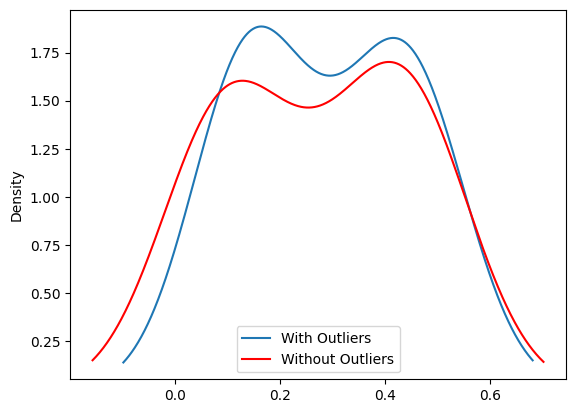

In [235]:
# plotting the std difference
fig = plt.figure()
ax = fig.add_subplot(111)
df2_scaled.std().plot(kind='kde', label='With Outliers', ax=ax)
df2_scaled_nooutlier.std().plot(kind='kde', label='Without Outliers', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Removing 1%, 5%, and 10% of the data randomly and imputing the values back using at least 3 imputation methods.

In [236]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Function to randomly remove a percentage of data
def remove_percentage_of_data(df2, percentage):
    num_rows_to_remove = int(len(df2) * percentage / 100)
    indices_to_remove = np.random.choice(df2.index, num_rows_to_remove, replace=False)
    df2_removed = df2.drop(indices_to_remove)
    return df2_removed, indices_to_remove



In [237]:
# Here the imputation is being carried out
# Function to impute missing values using various methods

def impute_missing_values(df2, method='mean'):
    imputer = None
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
    elif method == 'knn':
        imputer = KNNImputer()
    else:
        raise ValueError("Invalid imputation method. Choose from 'mean', 'median', or 'knn'.")

    df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
    return df2_imputed

In [238]:
# Function to assess recovery of missing values
def assess_recovery(original_df2, imputed_df2, indices_removed):
    # Calculate residuals for numeric data
    numeric_columns = original_df2.select_dtypes(include=np.number).columns

    residuals = original_df2[numeric_columns] - imputed_df2[numeric_columns]

    # Calculate percentage error on residuals
    percentage_error = (residuals.abs() / original_df2[numeric_columns]).mean() * 100

    # Calculate bias and variance of the error
    bias = residuals.mean()
    variance = residuals.var()

    return percentage_error, bias, variance


In [239]:
# Define the percentages of data to remove
percentages_to_remove = [1, 5, 10]

# Define imputation methods
imputation_methods = ['mean', 'median', 'knn']

# Results dictionary to store assessment results
results = {}

In [240]:
# Iterate over each percentage to remove
for percentage in percentages_to_remove:
    # Remove percentage of data
    df2_removed, indices_removed = remove_percentage_of_data(df2, percentage)

    # Iterate over each imputation method
    for method in imputation_methods:
        # Impute missing values
        df2_imputed = impute_missing_values(df2_removed, method)

        # Assess recovery of missing values
        percentage_error, bias, variance = assess_recovery(df2, df2_imputed, indices_removed)

        # Store results
        results[(percentage, method)] = {'Percentage Error': percentage_error, 'Bias': bias, 'Variance': variance}


In [241]:
# Print results
for key, value in results.items():
    print(f"Percentage of Data Removed: {key[0]}%, Imputation Method: {key[1]}")
    print("Percentage Error on Residuals:")
    print(value['Percentage Error'])
    print("Bias of Error:")
    print(value['Bias'])
    print("Variance of Error:")
    print(value['Variance'])
    print("-------")
    print()


Percentage of Data Removed: 1%, Imputation Method: mean
Percentage Error on Residuals:
PassengerId      1.341977
Survived              inf
Pclass          47.697244
Sex                   inf
Age            181.269625
SibSp                 inf
Parch                 inf
Fare                  inf
Embarked              inf
dtype: float64
Bias of Error:
PassengerId   -5.702152
Survived       0.002265
Pclass         0.000000
Sex           -0.001133
Age           -0.007928
SibSp          0.007928
Parch         -0.004530
Fare           0.222872
Embarked      -0.004530
dtype: float64
Variance of Error:
PassengerId       7.347694
Survived          0.455777
Pclass            1.244898
Sex               0.454647
Age             427.172184
SibSp             2.352545
Parch             1.092950
Fare           4663.525649
Embarked          1.172315
dtype: float64
-------

Percentage of Data Removed: 1%, Imputation Method: median
Percentage Error on Residuals:
PassengerId      1.341977
Survived         

# <center> <u> **Auto ML** </u> </center>

In [242]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import requests
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:
url_train = 'https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/Titanic/titanic.csv'
df_train = pd.read_csv(url_train)
df_train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2

In [245]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp82iq9yc8
  JVM stdout: /tmp/tmp82iq9yc8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp82iq9yc8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_77hq7v
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

# Correlation between dataset variables

In [246]:
df_train.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1  22.0      1      0   7.2500         2
1              2         1       1    0  38.0      1      0  71.2833         0
2              3         1       3    0  26.0      0      0   7.9250         2
3              4         1       1    0  35.0      1      0  53.1000         2
4              5         0       3    1  35.0      0      0   8.0500         2
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    1  27.0      0      0  13.0000         2
887          888         1       1    0  19.0      0      0  30.0000         2
888          889         0       3    0  15.0      1      2  23.4500         2
889          890         1       1    1  26.0      0      0  30.0000         0
890          891         0       3    1  32.0      0      0   7.7500         1

[891 rows x 9 columns]>

<Axes: >

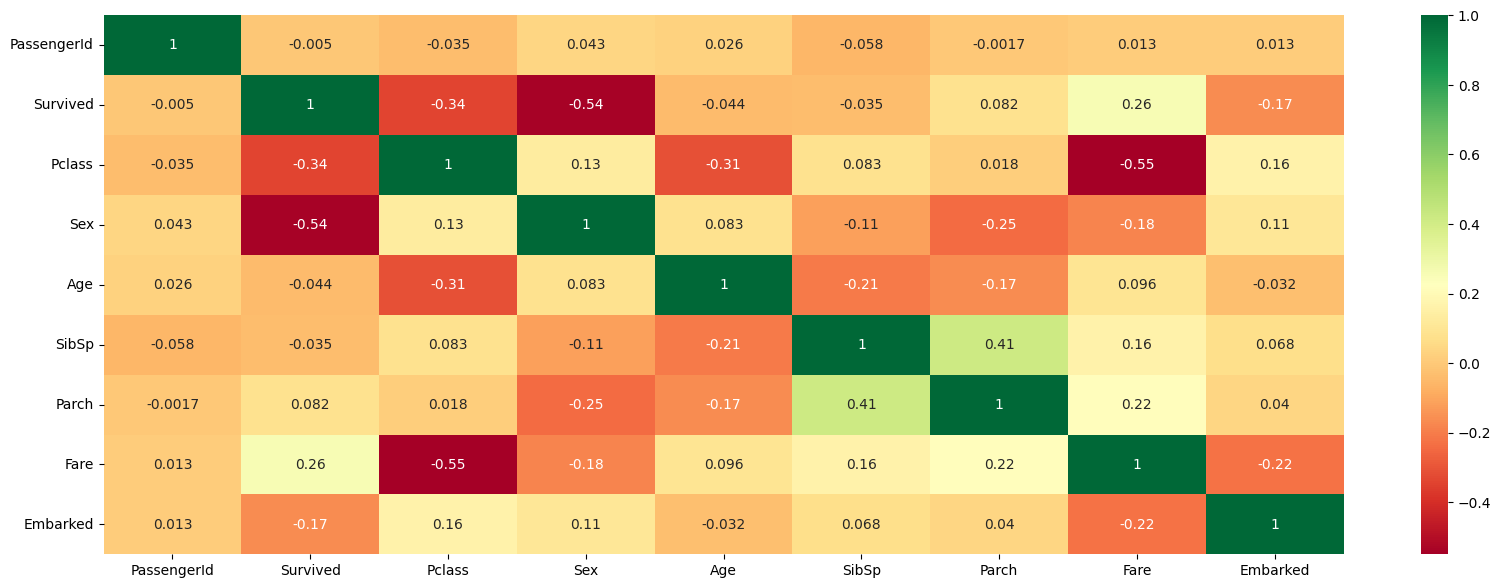

In [247]:
plt.figure(figsize=(20,7))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')

# VIF Multicollinearity

In [248]:
df= df_train

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

print(vif_data)

       feature       VIF
0  PassengerId  3.773758
1     Survived  2.005304
2       Pclass  6.485979
3          Sex  3.771405
4          Age  4.423620
5        SibSp  1.576121
6        Parch  1.619370
7         Fare  1.896417
8     Embarked  4.687874


Yes, based on the provided Variance Inflation Factor (VIF) values, we can infer that multicollinearity exists in the dataset. A common rule of thumb is that a VIF value greater than 5 indicates a problematic level of multicollinearity. In this case, the "Pclass" feature has a VIF of 6.485979, which suggests significant multicollinearity. Other features have VIF values less than 5, indicating moderate to low multicollinearity, but the value for "Pclass" is enough to establish the presence of multicollinearity in the dataset.

# H2O

In [249]:
x = df_train.columns.tolist()
y = "Survived"
x.remove(y)

In [250]:
train_frame = h2o.H2OFrame(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [251]:
aml = H2OAutoML(max_models=10, seed=42, max_runtime_secs=7200)
aml.train(x=x, y=y, training_frame=train_frame)

AutoML progress: |
23:16:04.995: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
23:16:14.411: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


23:16:16.954: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
23:16:21.437: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
23:16:28.954: _response param, We have d

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_231604


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  4/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      1/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.054023047042214375
RMSE: 0.2324285848216918
MAE: 0.17019648434367168
RMSLE: 0.16306244423125235
Mean Residual Deviance: 0.054023047042214375
R^2: 0.7715789973853567
Null degrees of freedom: 890
Residual degrees of freedom: 886
Null deviance: 210.72727272727357
Residual deviance: 48.134534914613006
AIC: -59.69650684435382

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13232723603144333
RMSE: 0.36376810749630506
MAE: 0.27040183316609356
RMSLE: 0.2560571811282315
Mean Residual Deviance: 0.13232723603144333
R^2: 0.44049213099906115
Null degrees of freedom: 890
Residual degrees of freedom: 886
Null deviance: 211.32853356805526
Residual deviance: 117.90356730401601
AIC: 738.5211354225797

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     157.798   9.70343     151.017       146.996       160.778       158.085       172.115
loglikelihood           0         0           0             0             0             0             0
mae                     0.271352  0.0108419   0.261869      0.26656       0.284657      0.262355      0.281319
mean_residual_deviance  0.132341  0.00781089  0.12482       0.126078      0.137679      0.130081      0.143049
mse                     0.132341  0.00781089  0.12482       0.126078      0.137679      0.130081      0.143049
null_deviance           42.2657   1.61868     42.6981       44.0995       39.7193       41.9547       42.8569
r2                      0.436868  0.0413448   0.470854      0.487684      0.390591      0.428009      0.407199
residual_deviance       23.5725   1.23755     22.5925       22.1897       23.9561       23.8048       25.3196
rmse                    0.363662  0.0106837   0.353299      0.355074      0.371051      0.360667      0.378218
rmsle                   0.256043  0.00771816  0.252331      0.248279      0.262763      0.251081      0.265761

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [252]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_231604  0.363768  0.132327  0.270402  0.256057                  0.132327
StackedEnsemble_AllModels_1_AutoML_1_20240402_231604     0.364996  0.133222  0.272084  0.257184                  0.133222
DRF_1_AutoML_1_20240402_231604                           0.368702  0.135941  0.266054  0.260234                  0.135941
GBM_2_AutoML_1_20240402_231604                           0.369119  0.136249  0.276171  0.260066                  0.136249
GBM_4_AutoML_1_20240402_231604                           0.370793  0.137488  0.273203  0.261369                  0.137488
GBM_3_AutoML_1_20240402_231604                           0.37833   0.143133  0.284753  0.266468                  0.143133
XGBoost_3_AutoML_1_20240402_231604                       0.381514  0.145553  0.27897   0.268575                  0.145553
GBM_1_AutoML_1_20240402_231604                           0.383354  0.14696   0.306491  0.270657                  0.14696
GLM_1_AutoML_1_20240402_231604                           0.383814  0.147313  0.298755  0.271288                  0.147313
XGBoost_1_AutoML_1_20240402_231604                       0.387124  0.149865  0.285971  0.2766                    0.149865
XRT_1_AutoML_1_20240402_231604                           0.392396  0.153974  0.32538   0.274165                  0.153974
XGBoost_2_AutoML_1_20240402_231604                       0.397168  0.157743  0.289335  0.283526                  0.157743
[12 rows x 6 columns]

In [253]:
bestmodel= aml.leader
bestmodel

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_231604


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  4/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      1/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.054023047042214375
RMSE: 0.2324285848216918
MAE: 0.17019648434367168
RMSLE: 0.16306244423125235
Mean Residual Deviance: 0.054023047042214375
R^2: 0.7715789973853567
Null degrees of freedom: 890
Residual degrees of freedom: 886
Null deviance: 210.72727272727357
Residual deviance: 48.134534914613006
AIC: -59.69650684435382

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13232723603144333
RMSE: 0.36376810749630506
MAE: 0.27040183316609356
RMSLE: 0.2560571811282315
Mean Residual Deviance: 0.13232723603144333
R^2: 0.44049213099906115
Null degrees of freedom: 890
Residual degrees of freedom: 886
Null deviance: 211.32853356805526
Residual deviance: 117.90356730401601
AIC: 738.5211354225797

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     157.798   9.70343     151.017       146.996       160.778       158.085       172.115
loglikelihood           0         0           0             0             0             0             0
mae                     0.271352  0.0108419   0.261869      0.26656       0.284657      0.262355      0.281319
mean_residual_deviance  0.132341  0.00781089  0.12482       0.126078      0.137679      0.130081      0.143049
mse                     0.132341  0.00781089  0.12482       0.126078      0.137679      0.130081      0.143049
null_deviance           42.2657   1.61868     42.6981       44.0995       39.7193       41.9547       42.8569
r2                      0.436868  0.0413448   0.470854      0.487684      0.390591      0.428009      0.407199
residual_deviance       23.5725   1.23755     22.5925       22.1897       23.9561       23.8048       25.3196
rmse                    0.363662  0.0106837   0.353299      0.355074      0.371051      0.360667      0.378218
rmsle                   0.256043  0.00771816  0.252331      0.248279      0.262763      0.251081      0.265761

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Predictor Relationship Significance

In [254]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df_train['Survived'], df_train[['PassengerId', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Embarked']]).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.501
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                              111.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                   7.13e-128
Time:                        23:17:02   Log-Likelihood:                         -527.72
No. Observations:                 891   AIC:                                      1071.
Df Residuals:                     883   BIC:                                      1110.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0003   5.48e-05      4.774      0.000       0.000       0.000
Pclass          0.0905      0.015      6.049      0.000       0.061       0.120
Sex            -0.4466      0.032    -13.873      0.000      -0.510      -0.383
Age             0.0049      0.001      5.286      0.000       0.003       0.007
SibSp          -0.0345      0.015     -2.284      0.023      -0.064      -0.005
Parch          -0.0064      0.021     -0.304      0.761      -0.048       0.035
Fare            0.0032      0.000      9.974      0.000       0.003       0.004
Embarked        0.0531      0.018      2.890      0.004       0.017       0.089
==============================================================================
Omnibus:                       47.246   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.013
Skew:                           0.455   Prob(JB):                     1.24e-09
Kurtosis:                       2.473   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
train_frame = h2o.H2OFrame(df_train)

train, test = train_frame.split_frame(ratios=[.8], seed=1234)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [256]:
x = list(set(train.col_names) - set(["Survived"]))
y = "Survived"

In [257]:
preds = bestmodel.predict(test)
test_df = test.as_data_frame()
preds_df = preds.as_data_frame()
test_df.columns

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [258]:
preds_df.columns

Index(['predict'], dtype='object')

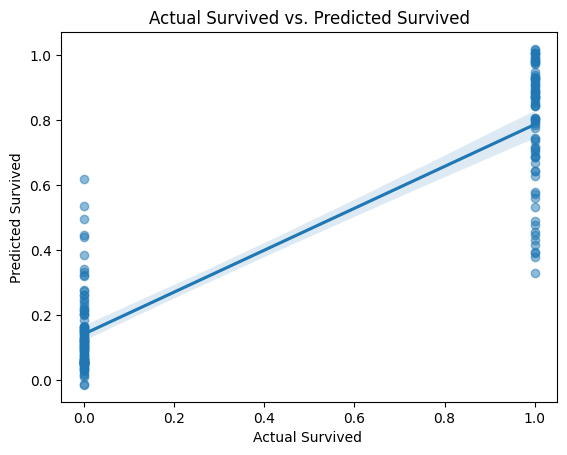

In [259]:
sns.regplot(x=test_df[y], y=preds_df['predict'], scatter_kws={'alpha': 0.5})
plt.xlabel('Actual Survived ')
plt.ylabel('Predicted Survived')
plt.title('Actual Survived vs. Predicted Survived')
plt.show()

A close alignment between predicted values and actual observed values signifies that the model has effectively learned the underlying patterns in the dataset and can generalize well to new, unseen data. The metrics from the graph serve as quantitative measures to assess the model's accuracy, where lower values indicate better predictive performance.

# Checking if any assumptions are violated

In [260]:
test_frame = h2o.H2OFrame(test)

In [261]:
predictions = bestmodel.predict(test_frame)
predictions_frame = h2o.H2OFrame(predictions)
# Add predictions to test set
test_frame['Predicted'] = predictions


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


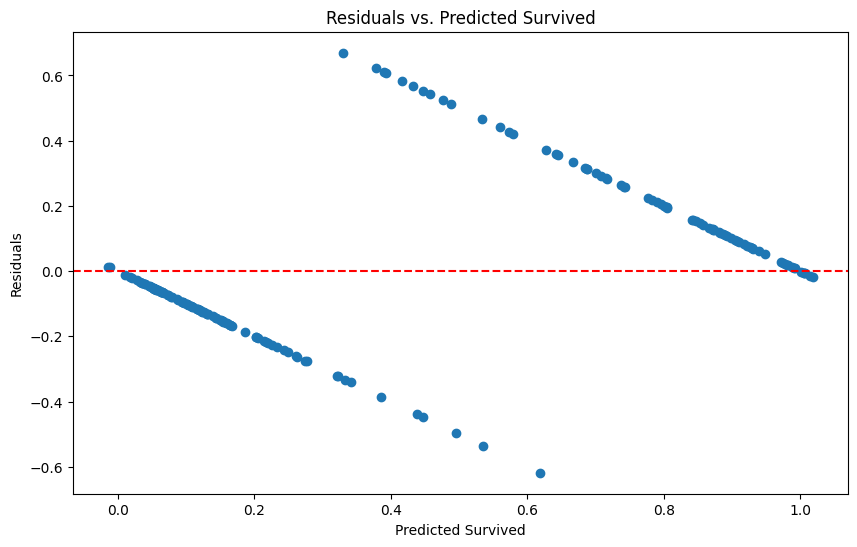

In [262]:
# Convert to pandas DataFrame
test_df = test_frame.as_data_frame()

residuals = test_df[y] - test_df['Predicted']

plt.figure(figsize=(10, 6))
plt.scatter(test_df['Predicted'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Survived')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Survived')
plt.show()


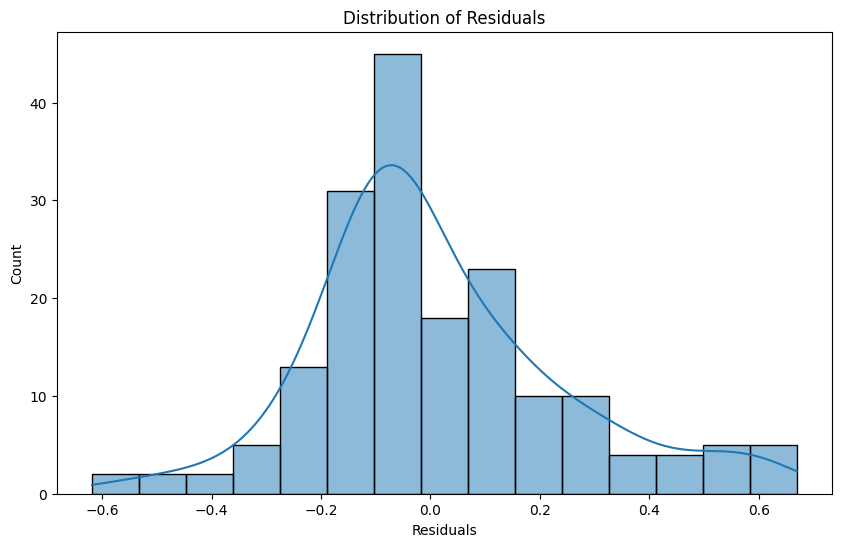

In [263]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

The x-axis represents predicted prices, and the y-axis represents residuals (the difference between actual and predicted values).
The dashed red line at the 0 mark on the residuals axis indicates the baseline where residuals would be zero.
The red dots (data points) are scattered across the plot.
Notably, there is a pattern in the distribution of residuals. They are not evenly dispersed around the horizontal axis.
This lack of even dispersion suggests heteroscedasticity, meaning that the variance of residuals changes as predicted prices vary.
In summary, this graph does not exhibit homoscedasticity because the residuals do not show a consistent spread across different predicted price levels.

#  Multicollinearity


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


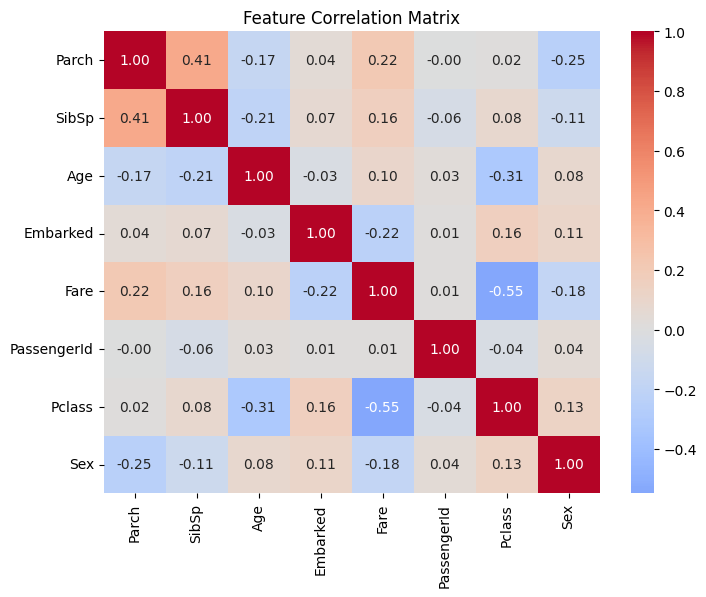

In [264]:
train_df = train_frame.as_data_frame(use_pandas=True)

features_df = train_df[x]

corr_matrix = features_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

Yes, there is  **multicollinearity** in this feature correlation matrix. For instance, the correlation between **Pclass** and **Fare** is indicating a strong inverse relationship. **Multicollinearity** occurs when two or more predictor variables are highly correlated, which can lead to challenges in interpreting regression models. In this case, it's essential to consider the impact of correlated features on model performance and potentially address it through techniques like **ridge regression** or **principal components regression**⁷⁸.



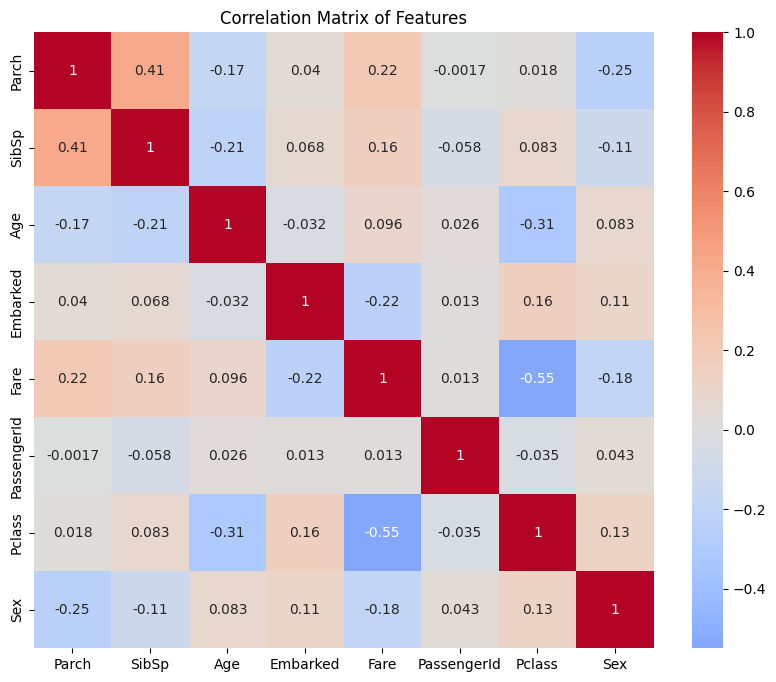

In [265]:
features_df = train_df[x]

corr_matrix = features_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

The presence of correlations between predictor variables, such as the strong negative correlation between Pclass and Fare and the positive correlation between Parch and SibSp, indicates that these predictors are not independent of each other. This interdependence among variables suggests that changes in one variable are associated with changes in another

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


Variable importance for model DRF_1_AutoML_1_20240402_231604:


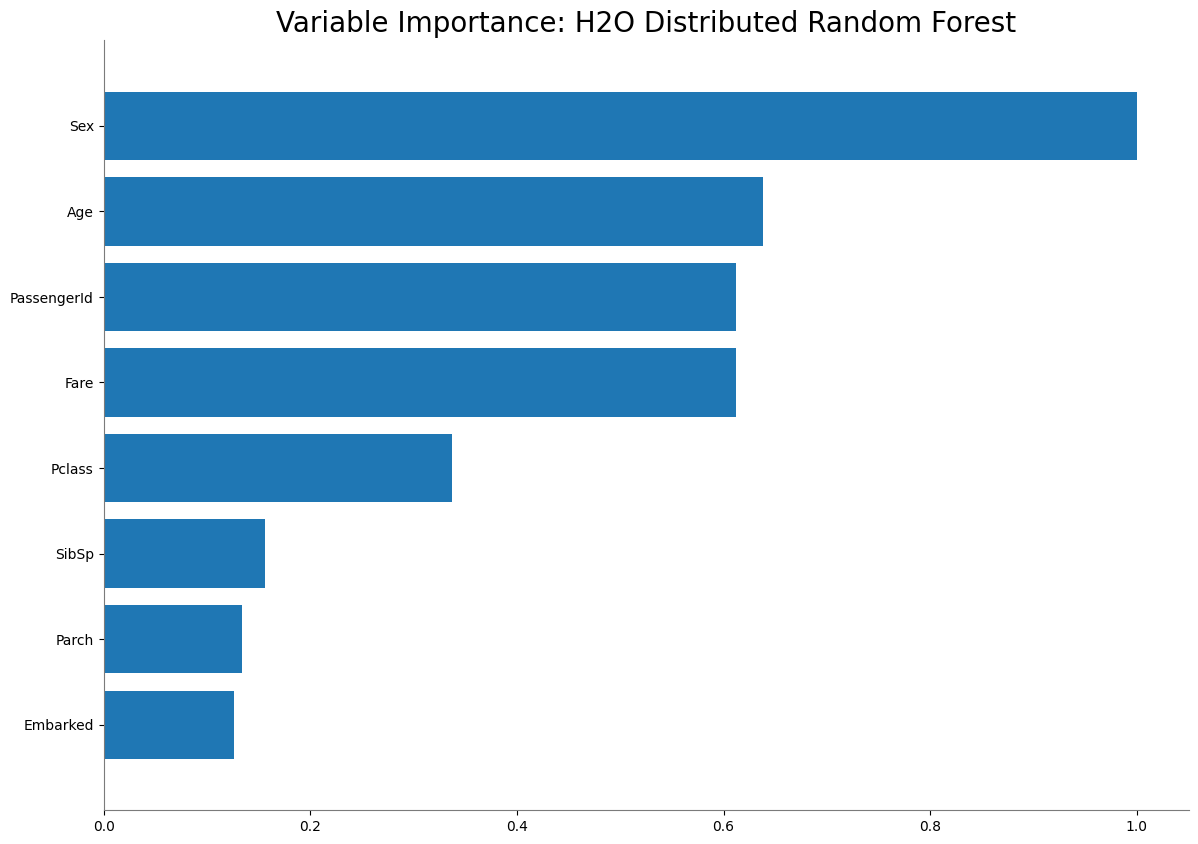

<Figure size 640x480 with 0 Axes>

In [266]:
metalearner = h2o.get_model(bestmodel.metalearner()['name'])

base_model_ids = list(metalearner.coef_norm().keys())[1:]
base_models = [h2o.get_model(mid) for mid in base_model_ids]

for base_model in base_models:
    if hasattr(base_model, 'varimp'):
        print(f"Variable importance for model {base_model.model_id}:")
        base_model.varimp_plot()
        break

A ranking of the most significant predictor variables:

Sex: Appears to be the most significant predictor.
Fare: Follows closely in importance.
Age: Also influential.
PassengerId and Pclass: Moderate importance.
SibSp, Parch, and Embarked: Less significant.

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

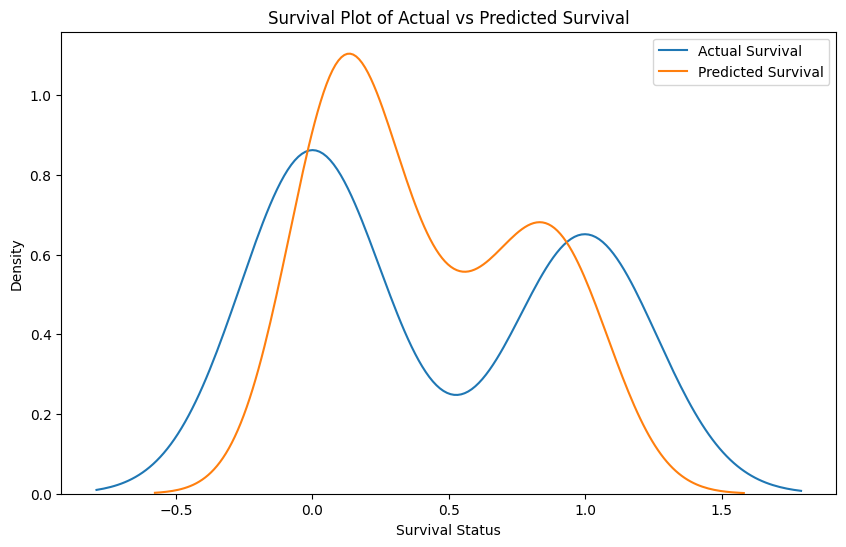

In [267]:
#Convert H2OFrame to Pandas DataFrame
test_df = test_frame.as_data_frame()
predictions_df = predictions_frame.as_data_frame()

#Extract actual and predicted values
actual_survived = test_df[y]
predicted_survived = predictions_df['predict']

plt.figure(figsize=(10, 6))
sns.kdeplot(actual_survived, label='Actual Survival', bw_adjust=1.5)
sns.kdeplot(predicted_survived, label='Predicted Survival', bw_adjust=1.5)
plt.xlabel('Survival Status')
plt.ylabel('Density')
plt.title('Survival Plot of Actual vs Predicted Survival')
plt.legend()
plt.show()


The Survival Plot comparing actual and predicted survival shows that the machine learning model broadly understands the data's patterns, accurately identifying trends in survival probabilities. However, differences in the peaks and shapes of the curves suggest the model's predictions are not perfectly aligned with reality, indicating overestimation or underestimation in certain areas. This reveals the model's effectiveness while also highlighting areas for improvement to enhance prediction accuracy.

# Regularization

In [268]:
X = df_train[['PassengerId','Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked' ]]

y = df_train['Survived']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [269]:
# Separate features and target variable for training data
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# Initialize Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Fit the model on the training data
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [270]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("rmse after regularization",rmse)

rmse after regularization 0.40462023833652594


RMSE for best_model : 0.369385724671478
rmse after regularization 0.40462023833652594
No, regularization does not help in this case because the RMSE increased after applying regularization, indicating worse model performance.

# Independent variables' significance

---



/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


Variable importances for base model DRF_1_AutoML_1_20240402_231604:


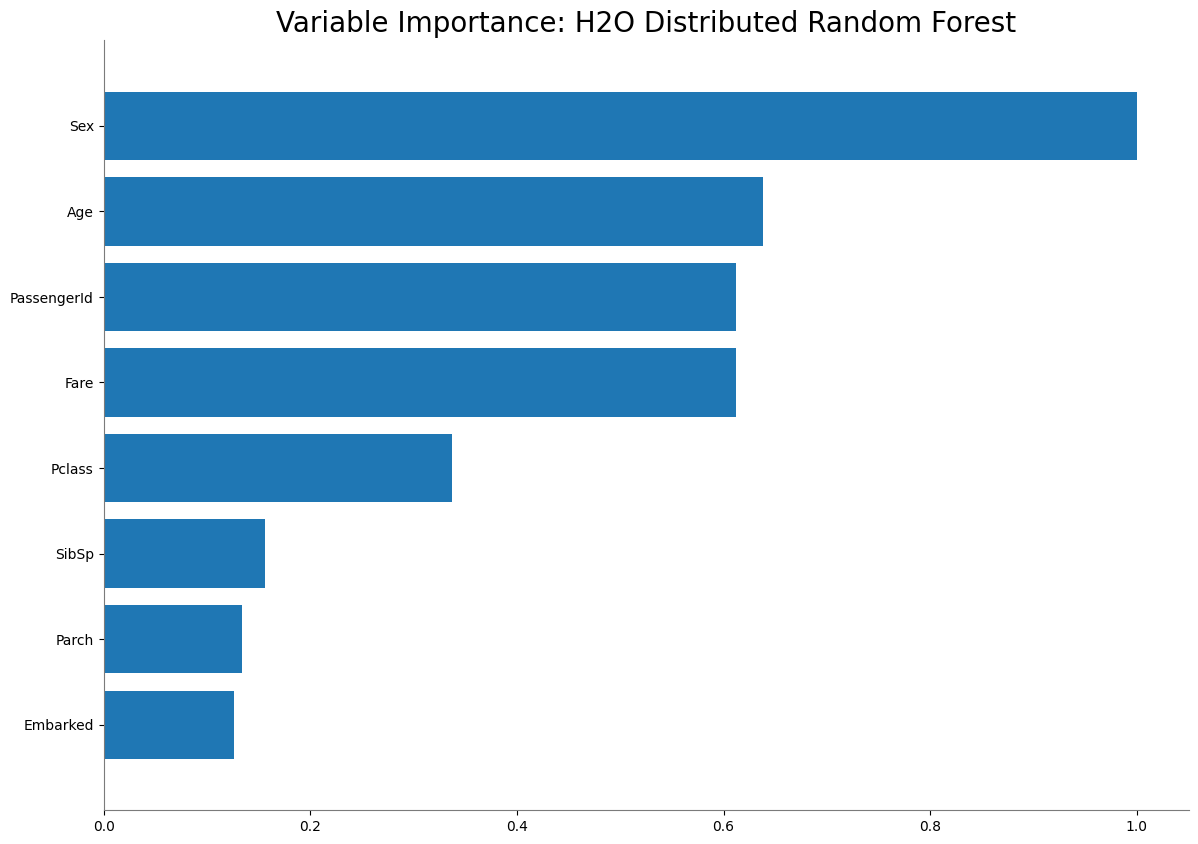

Variable importances for base model GBM_2_AutoML_1_20240402_231604:


<Figure size 640x480 with 0 Axes>

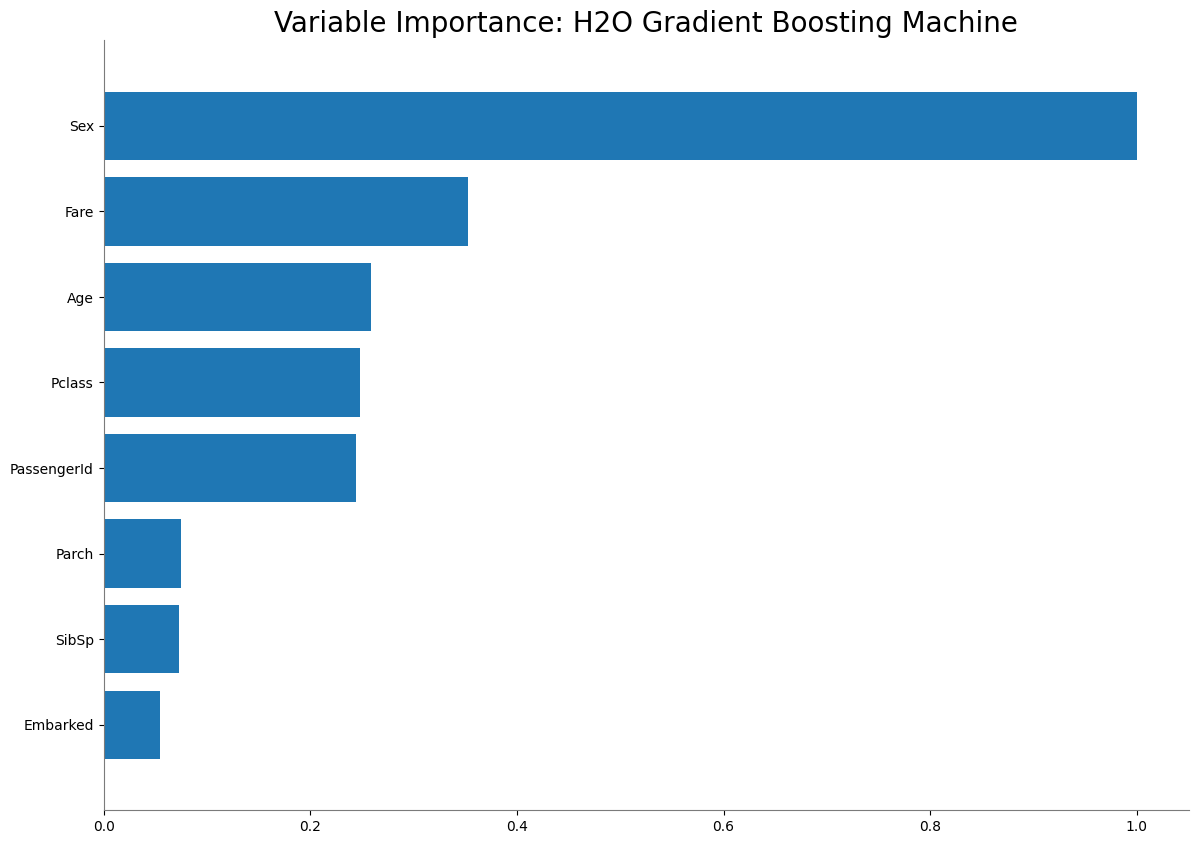

Variable importances for base model XGBoost_3_AutoML_1_20240402_231604:


<Figure size 640x480 with 0 Axes>

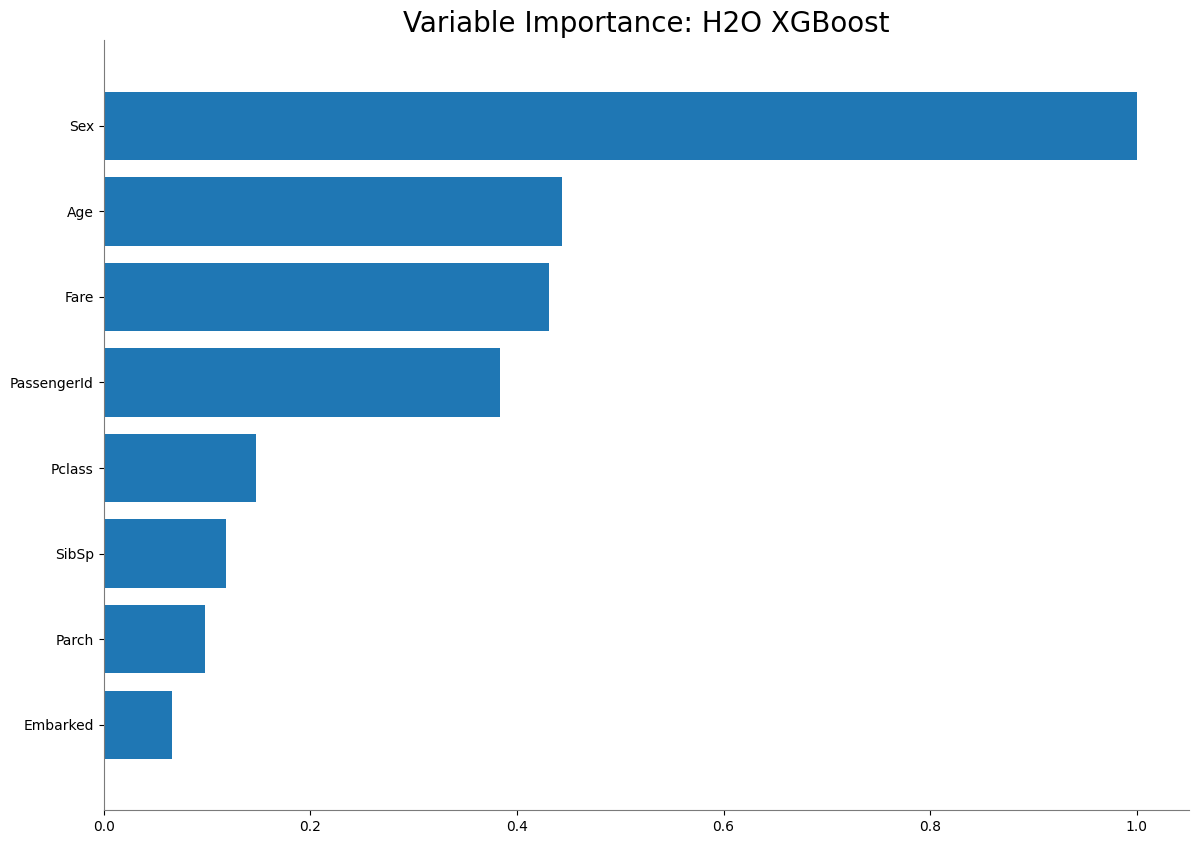

Variable importances for base model GLM_1_AutoML_1_20240402_231604:


<Figure size 640x480 with 0 Axes>

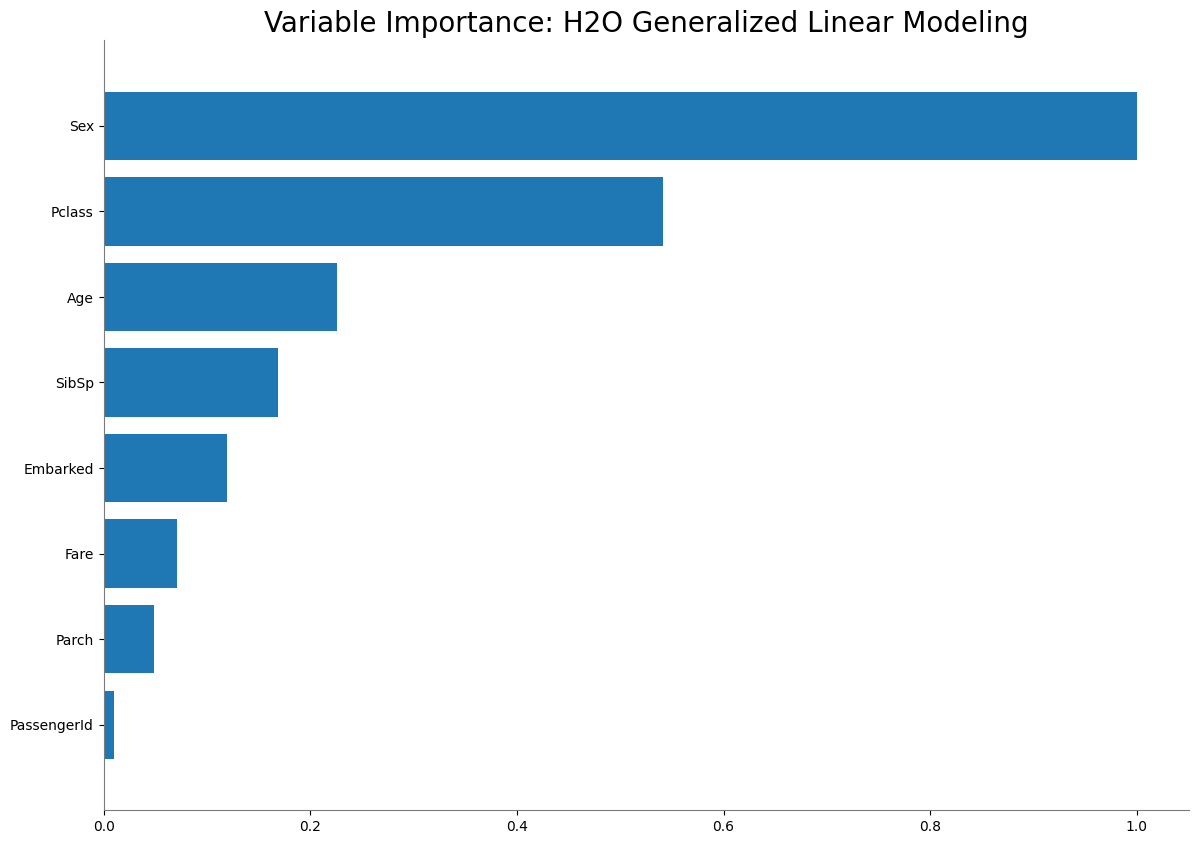

Variable importances for base model XRT_1_AutoML_1_20240402_231604:


<Figure size 640x480 with 0 Axes>

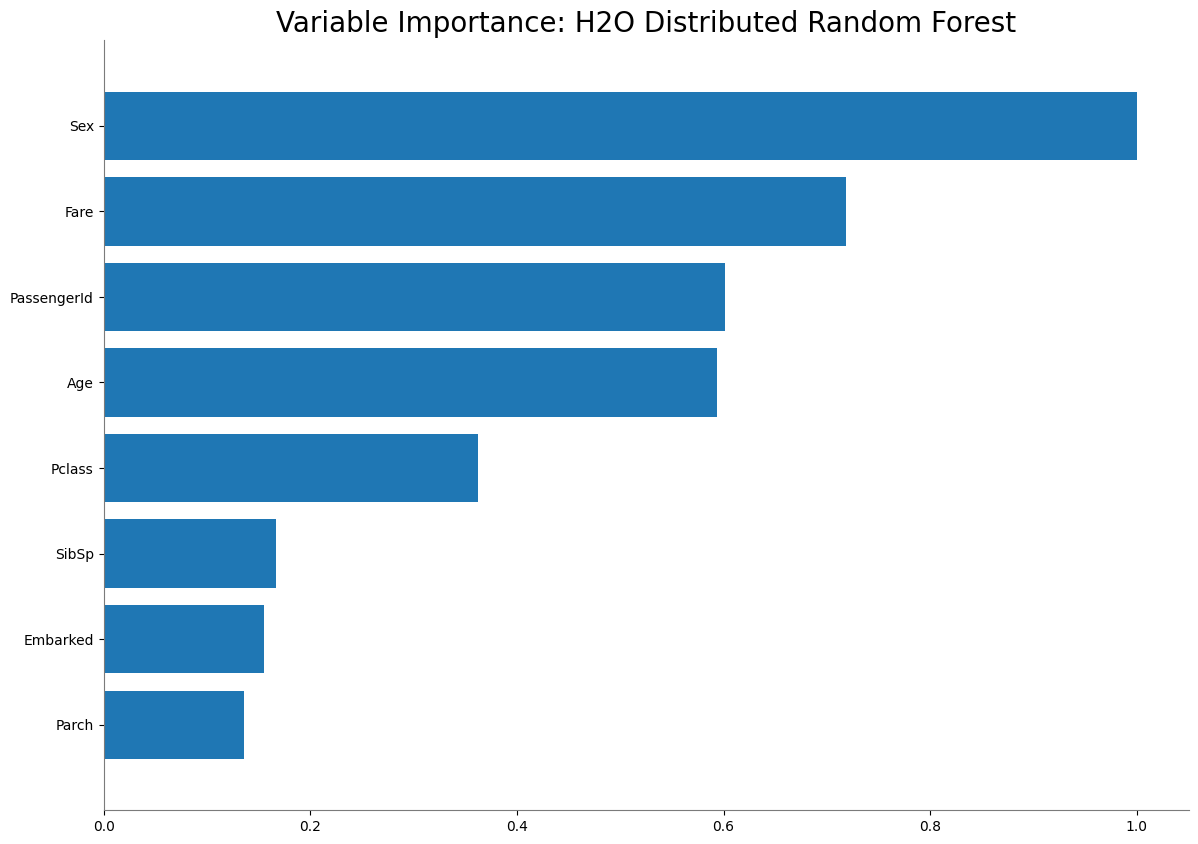

<Figure size 640x480 with 0 Axes>

In [271]:
best_model = aml.leader

# Check if the best model is a stacked ensemble
if 'StackedEnsemble' in best_model.model_id:
    # Retrieve the metalearner model
    metalearner = h2o.get_model(best_model.metalearner()['name'])

    # Extract the base models of the stacked ensemble
    base_models = [h2o.get_model(key['name']) for key in best_model.params['base_models']['actual']]

    # Loop over the base models to extract their variable importances
    for bm in base_models:
        if hasattr(bm, 'varimp'):
            print(f"Variable importances for base model {bm.model_id}:")
            # Display the variable importance plot
            bm.varimp_plot()
        else:
            print(f"Base model {bm.model_id} has no variable importances.")
else:
    print("The best model is not a stacked ensemble.")

# Important Hyperparameters

In [272]:
print(base_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DRF_1_AutoML_1_20240402_231604', 'type': 'Key<Model>', 'URL': '/3/Models/DRF_1_AutoML_1_20240402_231604'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240402_231604_training_Key_Frame__upload_a4adbdf3ece7ababe277aac5973c49ca.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240402_231604_training_Key_Frame__upload_a4adbdf3ece7ababe277aac5973c49ca.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240402_231604_training_Key_Frame__upload_a4adbdf3ece7ababe277aac5973c49ca.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240402_231604_training_Key_Frame__upload_a4adbdf3ece7ababe277aac5973c49ca.hex'}}, 'validation_frame': {'default':

The important hyperparameters for the Gradient Boosting Machine (GBM) model are:

1. **`ntrees`** (Number of trees): It is set to 31 (actual) from an input of 10000, which indicates the model finalized with 31 trees to avoid overfitting or due to early stopping.

2. **`max_depth`** (Maximum depth of the trees): The actual value is 8, which controls the complexity of the model. A higher value can lead to more complex models, which might overfit.

3. **`min_rows`** (Minimum number of rows to make a split): Set to 10, this parameter helps in controlling the minimum size of the leaf nodes and thus helps in preventing overfitting.

4. **`sample_rate`** (Row sampling rate): With an actual value of 0.8, this parameter indicates that each tree was trained on 80% of the data instances, which helps in adding randomness and improving generalization.

5. **`col_sample_rate`** and **`col_sample_rate_per_tree`**: Both are set to 0.8, indicating that 80% of the features are used for training each tree, which helps in reducing overfitting and improving model robustness.

6. **`nfolds`**: The actual value is 5, indicating that 5-fold cross-validation was used for model validation, which helps in assessing the model's performance more reliably.

7. **`stopping_metric`** and **`stopping_tolerance`**: With "deviance" as the stopping metric and a tolerance of 0.038604571824109146, these parameters control when the training process should stop early to prevent overfitting.

8. **`learn_rate`**: The learning rate is 0.1, which determines the impact of each tree on the final outcome. A lower value makes the model more robust at the cost of requiring more trees.

These hyperparameters are crucial as they directly influence the model's ability to learn from the training data without overfitting, ensuring that the model generalizes well to unseen data.

#   <center> <u> **Model Interpretability** </u> </center>

The goal was to construct a regression model, a classifier model and using H20 AutoML to determine the best model for the choosen dataset. After building these models SHAP Analysis should be done all those models. By doing this, SHAP values are obtained and then compared with other model interpretability models.

# Importing required Libraries and H20 Initialization

In [273]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [274]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [275]:
!pip install yellowbrick

In [276]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [277]:
data = pd.read_csv("https://github.com/kunaltibe7/datascienceengmethods/raw/main/Titanic/titanic.csv")

In [278]:
data.shape

(891, 9)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [280]:
print(vif_data)

       feature       VIF
0  PassengerId  3.773758
1     Survived  2.005304
2       Pclass  6.485979
3          Sex  3.771405
4          Age  4.423620
5        SibSp  1.576121
6        Parch  1.619370
7         Fare  1.896417
8     Embarked  4.687874


In [281]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [282]:
cols= ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']
model = sm.OLS(y_train,sm.add_constant(X_train[cols])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     70.23
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.43e-89
Time:                        23:18:33   Log-Likelihood:                -402.38
No. Observations:                 891   AIC:                             822.8
Df Residuals:                     882   BIC:                             865.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2607      0.074     16.928      

As seen from the OLS summary p-value for 'PassengerId' ,'Parch' and 'Fare' is greater than 0.05. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is ~ 38%.

In [283]:
data=data.drop([ 'PassengerId' ,'Parch' ,'Fare'],axis=1)

Text(0.5, 1.0, 'Variable Correlation')

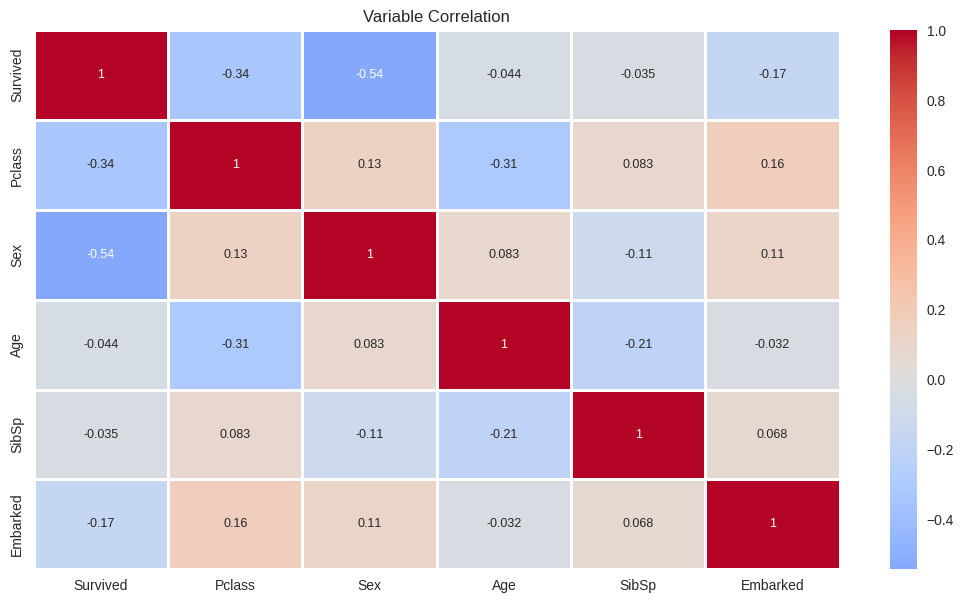

In [284]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Perform Linear Regression

In [285]:
#Computing Linear Regression model for Titanic dataset
def linear_reg(X_train,y_train,X_test,y_test):
    linear_reg = LinearRegression()
    linear_reg_model = linear_reg.fit(X_train,y_train)
    print('Train set')
    pred=linear_reg_model.predict(X_train)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_train,pred)))
    print('Test set')
    pred=linear_reg_model.predict(X_test)
    model_lr=linear_reg_model.predict(X_test)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_test,pred)))

In [286]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [287]:
cols1= ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']

In [288]:
#Computing R2 for testing and training data
linear_reg(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
Linear Regression Mean Squared error :0.14470470482979328
Linear Regression r2_score :0.3881575444189801
Test set
Linear Regression Mean Squared error :0.16501810266683317
Linear Regression r2_score :0.3263847566955028


# SHAP Analysis on Linear Regression model

In [289]:
%%capture
!pip install shap
import shap

In [290]:
import shap
shap.initjs()

In [291]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.sample(frac=0.01,random_state=200)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(model, X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X) #Saving SHAP values

In [292]:
#Initialize java script
shap.initjs()

 #Explain one row in the data with the
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [293]:
#Initializing explainer from shap, lm is our trained model
explainer_shap=shap.LinearExplainer(model=model, masker=X_train)

#Computing shap values for train dataset
shap_values = explainer_shap.shap_values(X_train)

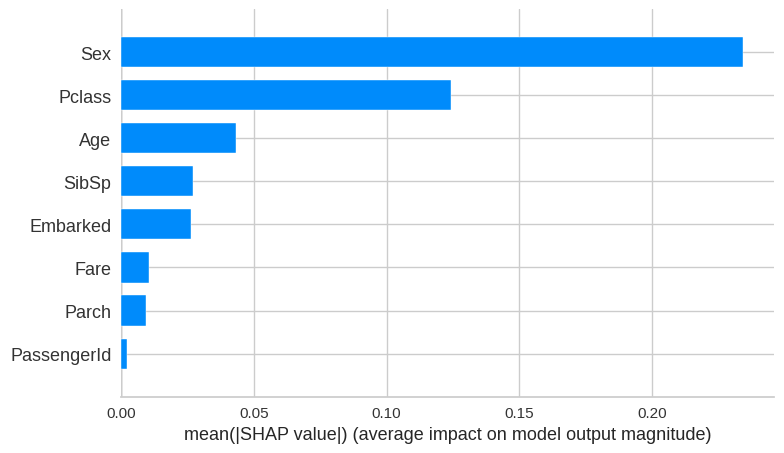

In [294]:
shap.summary_plot(shap_values, X, plot_type="bar")

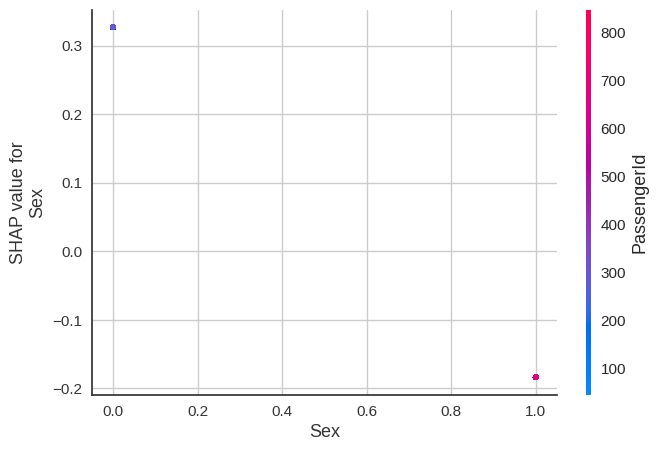

In [295]:
shap.dependence_plot("Sex", shap_values, X_train)

In [296]:
from sklearn.linear_model import LinearRegression
import shap

# train Linear model
#Seperating the dependent and independent variable from the main dataset
X=data.drop(['Survived'],axis=1)
y=data['Survived']
regressor = LinearRegression()
linear_reg = regressor.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(linear_reg, X)
shap_values = explainer(X)

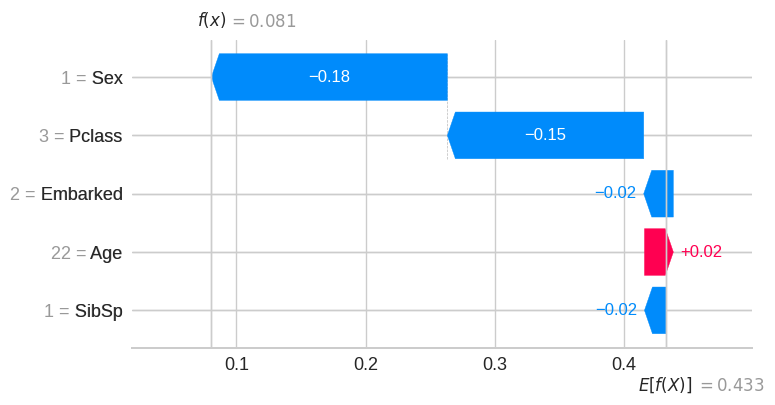

In [297]:
shap.plots.waterfall(shap_values[0])

For the linear regression model from the plots it can be interpreted that Sex, Outlet_Type, Pclass are the important features for this regressor model. These are the major features in determining the Survived people from the Titanic.

# Performing Random Forest

In [298]:
def ramdomforest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train,y_train)
    print('Train set')
    pred=rf_model.predict(X_train)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_train,pred)))
    print('Tesst set')
    pred=rf_model.predict(X_test)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_test,pred)))

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [299]:
ramdomforest(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
ramdomforest Mean Squared error :0.05523876798523452
ramdomforest r2_score :0.7664386691012581
Tesst set
ramdomforest Mean Squared error :0.06366076941514537
ramdomforest r2_score :0.7401323613257516


# SHAP Analysis on Random Forest Model

In [300]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest)
#Saving shap values
shap_values = explainer.shap_values(X)

In [301]:
shap.initjs() #Initialize java script
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:]) #Explain one row in the data with the model

In [302]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

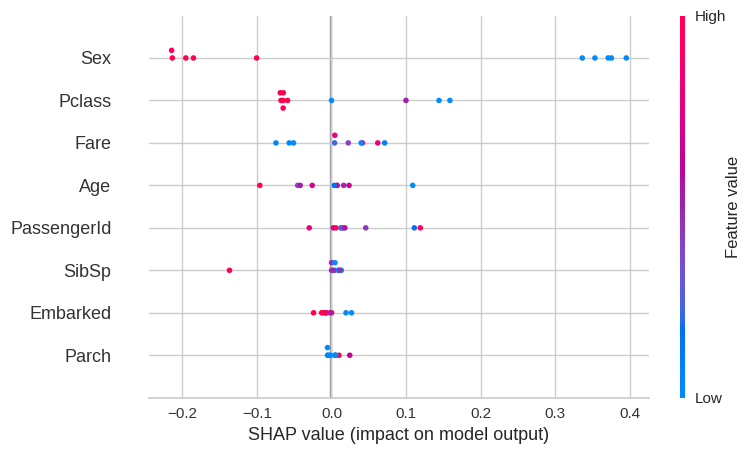

In [303]:
shap.initjs()
shap.summary_plot(shap_values, X)

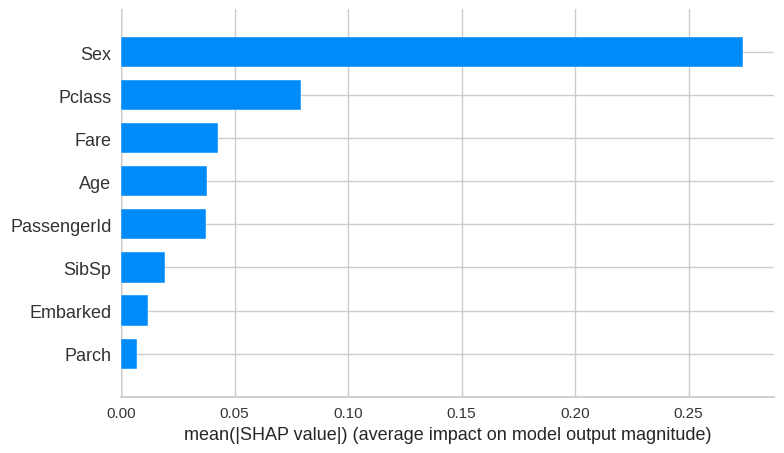

In [304]:
shap.summary_plot(shap_values, X, plot_type="bar")

For the random forest model according to SHAP Analysis the important features to determine the target variable 'Survived' are Sex, Pclass and Fare. Sex and Pclasss are the common feature which is important for both Random Forest and Linear Regression Model. Sex has the highest value of feature importance and is placed first on the scale.

# Using AutoML to identify best model


In [305]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

In [306]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [307]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:6020..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwjstd3lo
  JVM stdout: /tmp/tmpwjstd3lo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwjstd3lo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:6020
Connecting to H2O server at http://127.0.0.1:6020 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_fjnny2
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:6020
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [308]:
# Create a 80/20 train/test split
url = 'https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/Titanic/titanic.csv'
df = h2o.import_file(path = url)
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [309]:
# Set the features and target
X=df.columns
print(X)

y ='Survived'
X.remove(y)
print(X)

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [310]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
# Passing the training and testing dataset through H20 AutomML
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |
23:19:25.880: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
23:19:34.857: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
23:19:37.47: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
23:19:41.410: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
23:19:42.153: _response param, We have dete

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20240402_231925


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0716632160123864
RMSE: 0.26769986180868005
MAE: 0.1976318857582678
RMSLE: 0.18557493167163058
Mean Residual Deviance: 0.0716632160123864
R^2: 0.6971903132261645
Null degrees of freedom: 696
Residual degrees of freedom: 691
Null deviance: 164.95265423242648
Residual deviance: 49.94926156063332
AIC: 154.8632658130515

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1373306503765467
RMSE: 0.3705815030145821
MAE: 0.27514293274104135
RMSLE: 0.2604748725043195
Mean Residual Deviance: 0.1373306503765467
R^2: 0.41971553135737594
Null degrees of freedom: 696
Residual degrees of freedom: 691
Null deviance: 165.6659211534946
Residual deviance: 95.71946331245306
AIC: 608.2017783418065

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     130.034   20.7836    115.273       147.442       116.119       113.874       157.459
loglikelihood           0         0          0             0             0             0             0
mae                     0.275513  0.0314278  0.256604      0.288812      0.257433      0.249882      0.324834
mean_residual_deviance  0.137687  0.0238833  0.116066      0.153004      0.126178      0.121213      0.171976
mse                     0.137687  0.0238833  0.116066      0.153004      0.126178      0.121213      0.171976
null_deviance           33.1332   1.855      34.6004       33.553        30.5877       31.9231       35.0017
r2                      0.415742  0.0800441  0.50297       0.3569        0.447809      0.462006      0.309026
residual_deviance       19.1439   3.02752    17.1777       21.5735       16.7816       16.9699       23.2167
rmse                    0.369982  0.0316259  0.340684      0.391157      0.355215      0.348157      0.4147
rmsle                   0.260197  0.0191469  0.242697      0.271166      0.249622      0.248982      0.28852

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [311]:
print(aml.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240402_231925  0.370582  0.137331  0.275143  0.260475                  0.137331
StackedEnsemble_AllModels_2_AutoML_1_20240402_231925     0.371055  0.137682  0.278225  0.261016                  0.137682
StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_231925  0.371233  0.137814  0.277354  0.2608                    0.137814
StackedEnsemble_AllModels_1_AutoML_1_20240402_231925     0.37259   0.138823  0.277513  0.262312                  0.138823
StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_231925  0.372643  0.138863  0.278321  0.26249                   0.138863
GBM_grid_1_AutoML_1_20240402_231925_model_2              0.372989  0.139121  0.278955  0.261757                  0.139121
GBM_grid_1_AutoML_1_20240402_231925_model_17             0.373031  0.139152  0.290264  0.262931                  0.139152
XGBoost_grid_1_AutoML_1_

In [312]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'StackedEnsemble_BestOfFamily_4_AutoML_1_20240402_231925': 0,
 'StackedEnsemble_AllModels_2_AutoML_1_20240402_231925': 1,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_231925': 2,
 'StackedEnsemble_AllModels_1_AutoML_1_20240402_231925': 3,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_231925': 4,
 'GBM_grid_1_AutoML_1_20240402_231925_model_2': 5,
 'GLM_1_AutoML_1_20240402_231925': 37}

In [313]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

5


In [314]:
#Printing the best model
print("The best model is - " , best_model.algo)

The best model is -  gbm


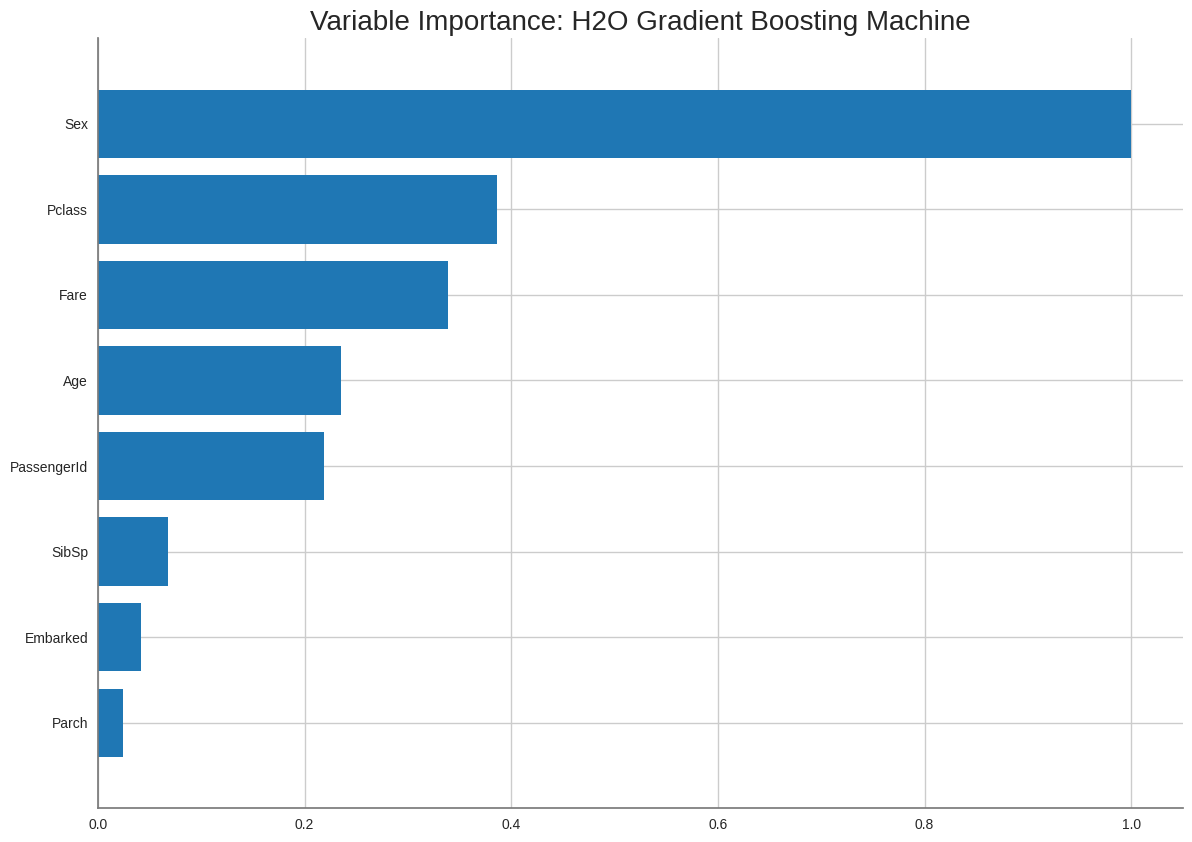

<Figure size 800x550 with 0 Axes>

In [315]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

# SHAP Analysis on AutoML model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
GBM_2_AutoML_1_20240402_231925                           0.367606  0.135135  0.284109  0.259774                  0.135135                 266                   0.012087  GBM
GBM_grid_1_AutoML_1_20240402_231925_model_2              0.372155  0.1385    0.281565  0.262441                  0.1385                   101                   0.02018   GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20240402_231925  0.373882  0.139788  0.28781   0.263066                  0.139788                 270                   0.080768  StackedEnsemble
GBM_grid_1_AutoML_1_20240402_231925_model_5              0.374006  0.139881  0.281657  0.263828                  0.139881                 140                   0.011481  GBM
GBM_grid_1_AutoML_1_20240402_231925_model_7              0.37623   0.141549  0.298776  0.265821                  0.141549                  76                   0.012444  GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_231925  0.376295  0.141598  0.289907  0.266404                  0.141598                 386                   0.037127  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20240402_231925     0.376741  0.141933  0.3044    0.26426                   0.141933                 762                   0.220842  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20240402_231925     0.376743  0.141935  0.304407  0.264261                  0.141935                 446                   0.179136  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240402_231925     0.37754   0.142536  0.292114  0.267396                  0.142536                 596                   0.076149  StackedEnsemble
GBM_grid_1_AutoML_1_20240402_231925_model_13             0.377574  0.142562  0.300396  0.268437                  0.142562                 251                   0.018713  GBM
XGBoost_grid_1_AutoML_1_20240402_231925_model_29         0.378176  0.143017  0.286845  0.267053                  0.143017                 386                   0.004549  XGBoost
GBM_grid_1_AutoML_1_20240402_231925_model_9              0.378209  0.143042  0.298401  0.2665                    0.143042                  65                   0.012288  GBM
StackedEnsemble_AllModels_2_AutoML_1_20240402_231925     0.379281  0.143854  0.285051  0.266944                  0.143854                 629                   0.119344  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_231925  0.379743  0.144205  0.285778  0.267263                  0.144205                 631                   0.060355  StackedEnsemble
DRF_1_AutoML_1_20240402_231925                           0.381089  0.145229  0.290935  0.270814                  0.145229                 502                   0.016895  DRF
GBM_5_AutoML_1_20240402_231925                           0.381122  0.145254  0.298715  0.270726                  0.145254                 454                   0.013617  GBM
GBM_4_AutoML_1_20240402_231925                           0.38128   0.145374  0.290299  0.26869                   0.145374                 233                   0.013526  GBM
StackedEnsemble_BestOfFamily_5_AutoML_1_20240402_231925  0.381406  0.14547   0.29035   0.269378                  0.14547                 1081                   0.073936  StackedEnsemble
DeepLearning_grid_1_AutoML_1_20240402_231925_model_1     0.382138  0.146029  0.279228  0.272204                  0.146029                6695                   0.009623  DeepLearning
XGBoost_grid_1_AutoML_1_20240402_231925_model_16         0.382465  0.146279  0.295279  0.269967                  0.146279                 475                   0.005276  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

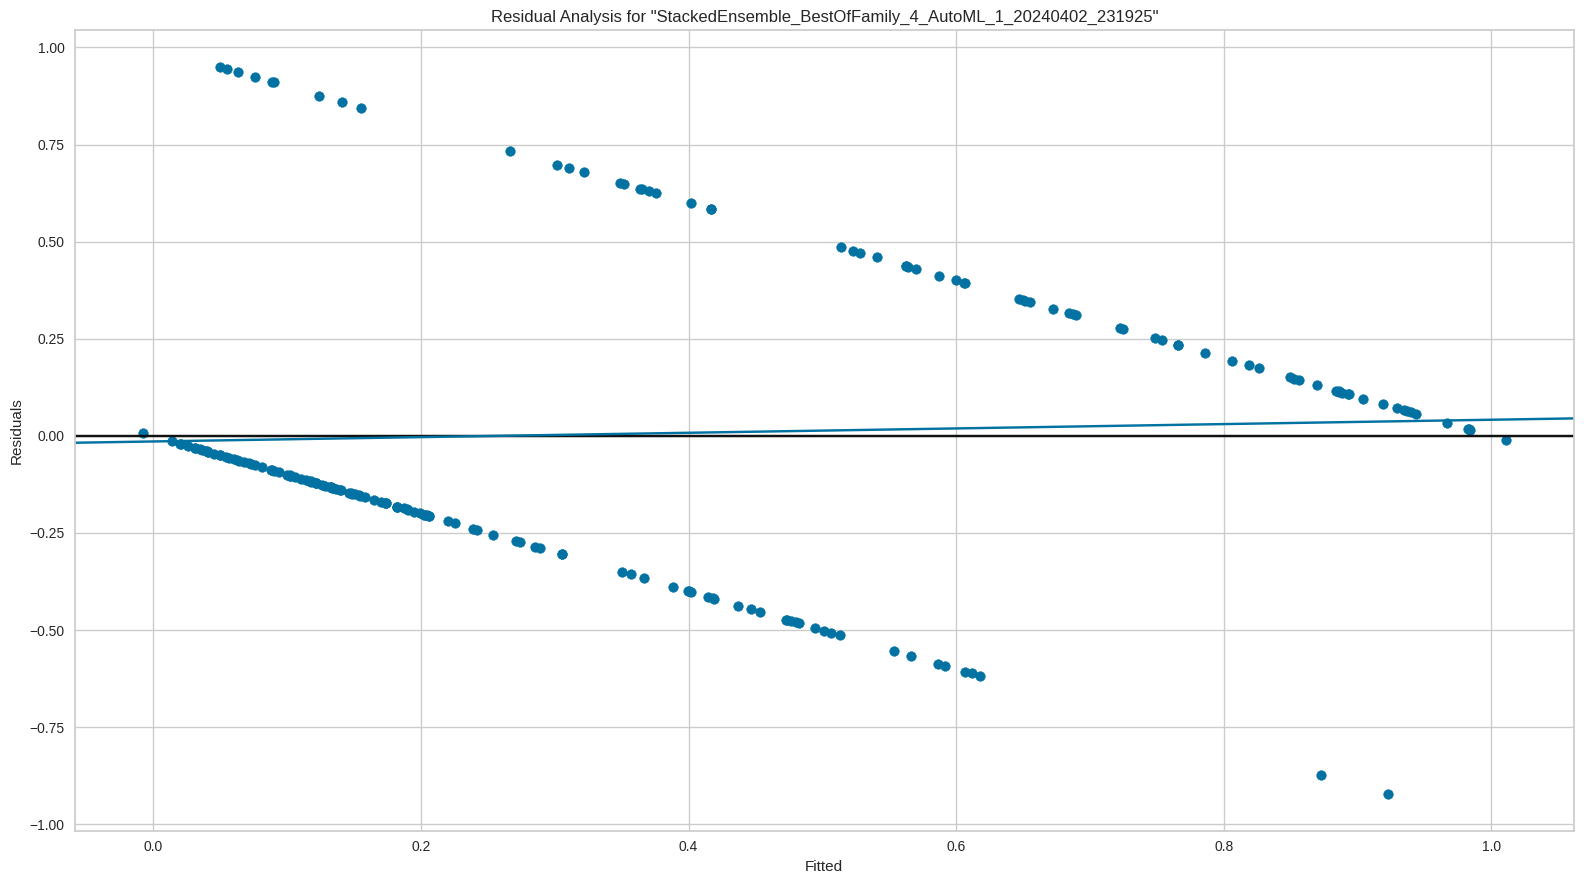

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

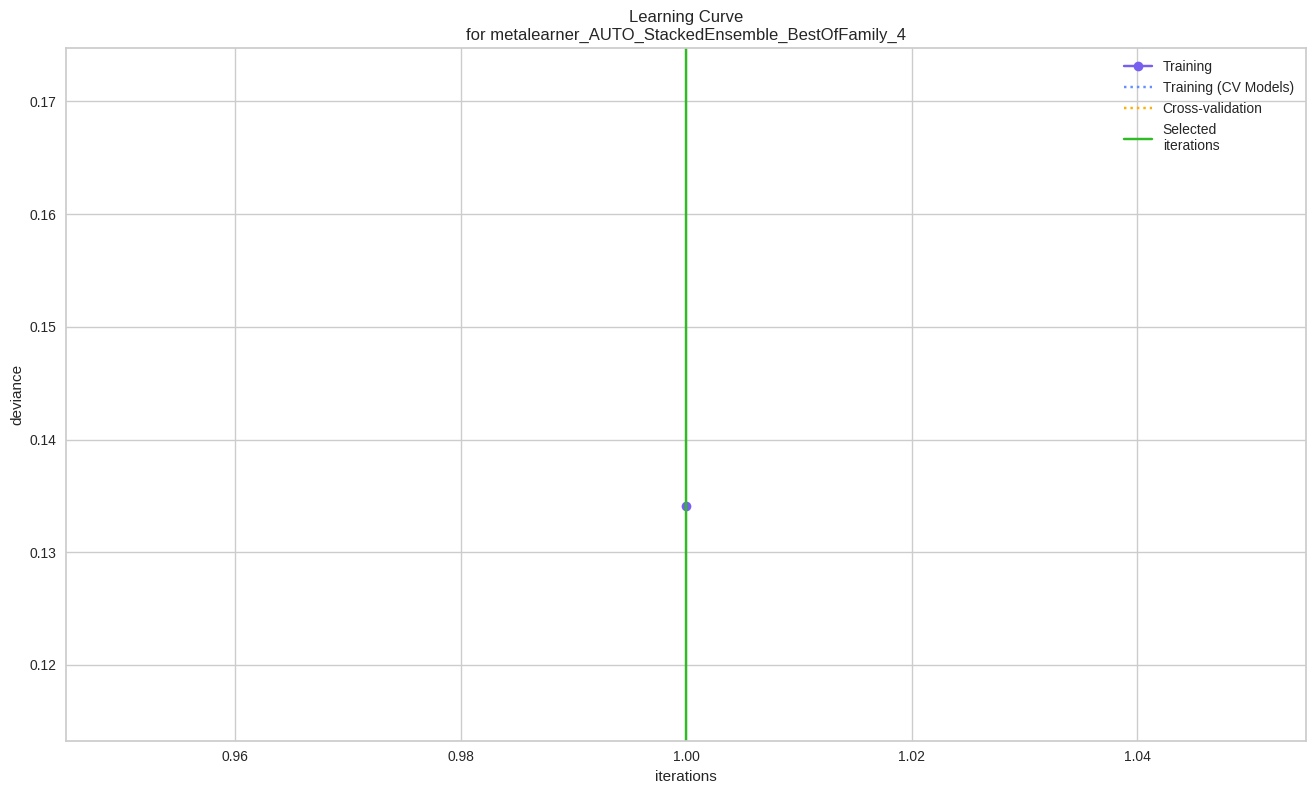

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

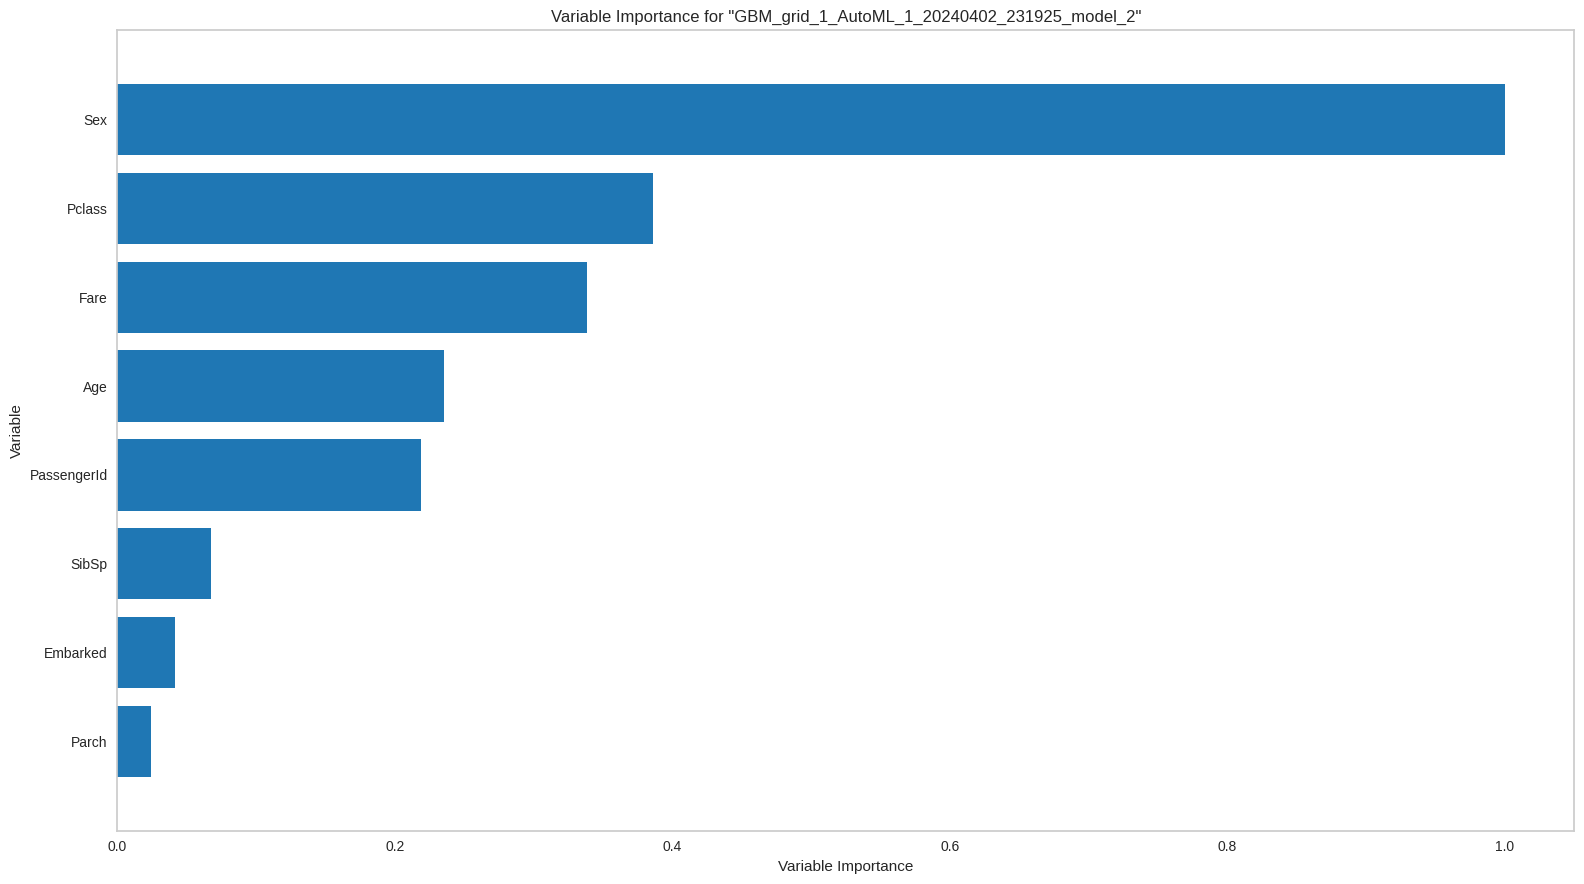

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

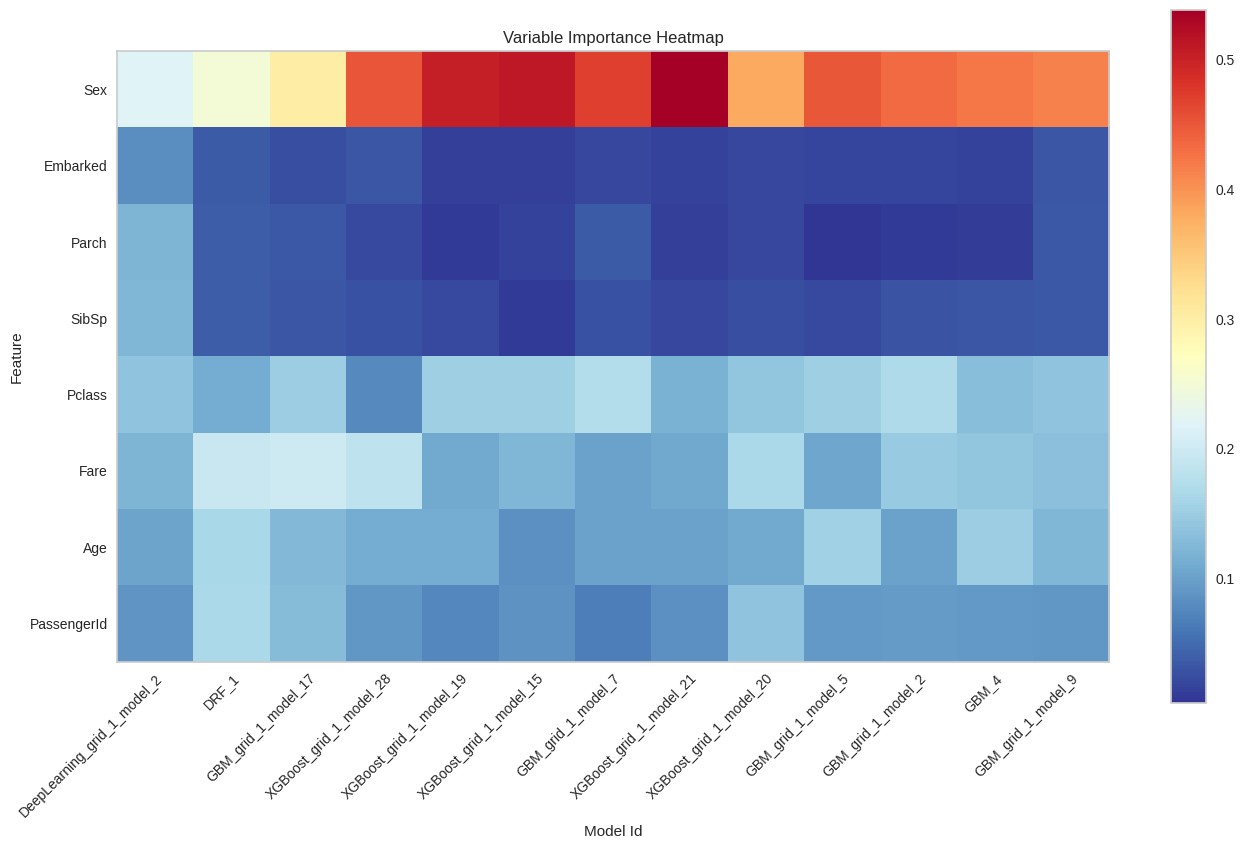

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

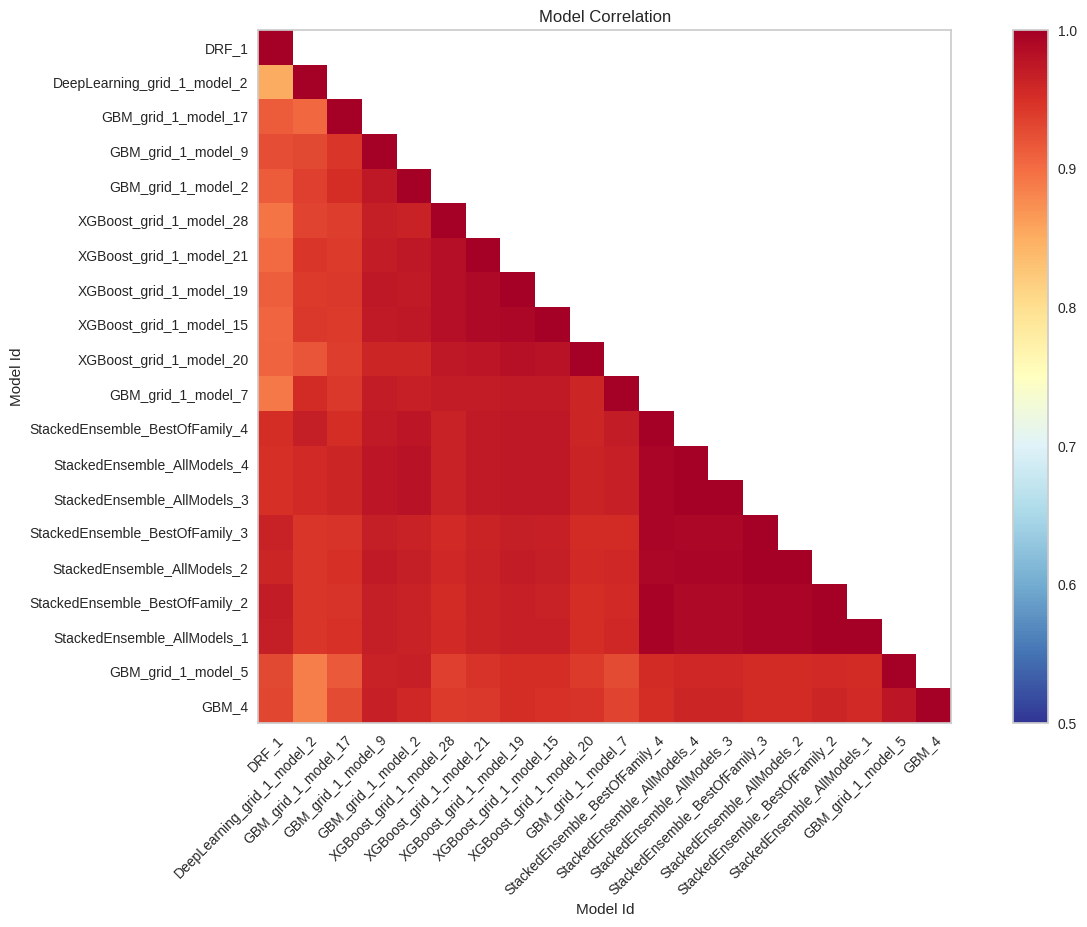

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

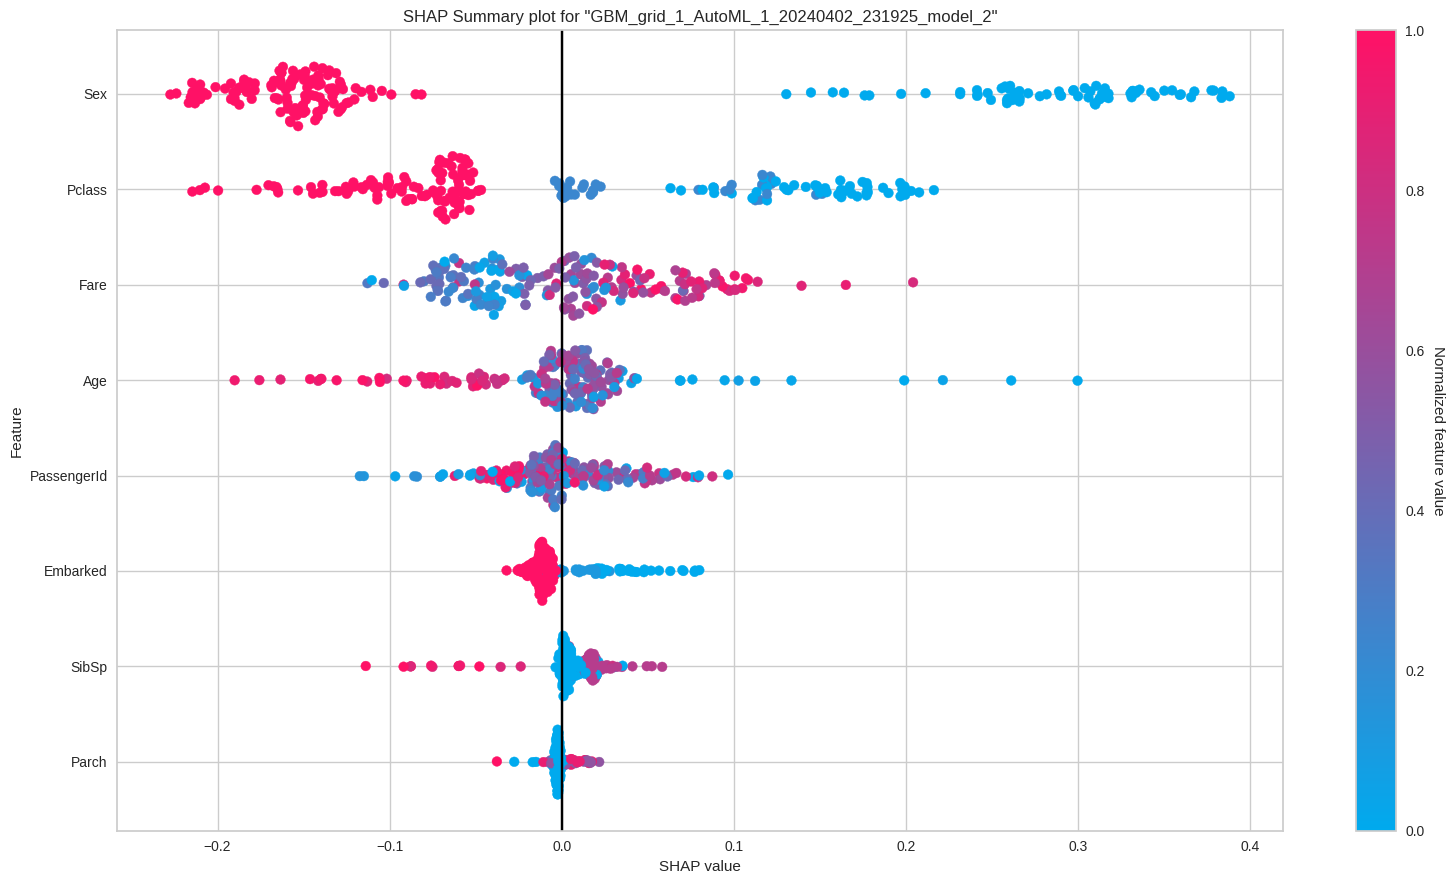

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

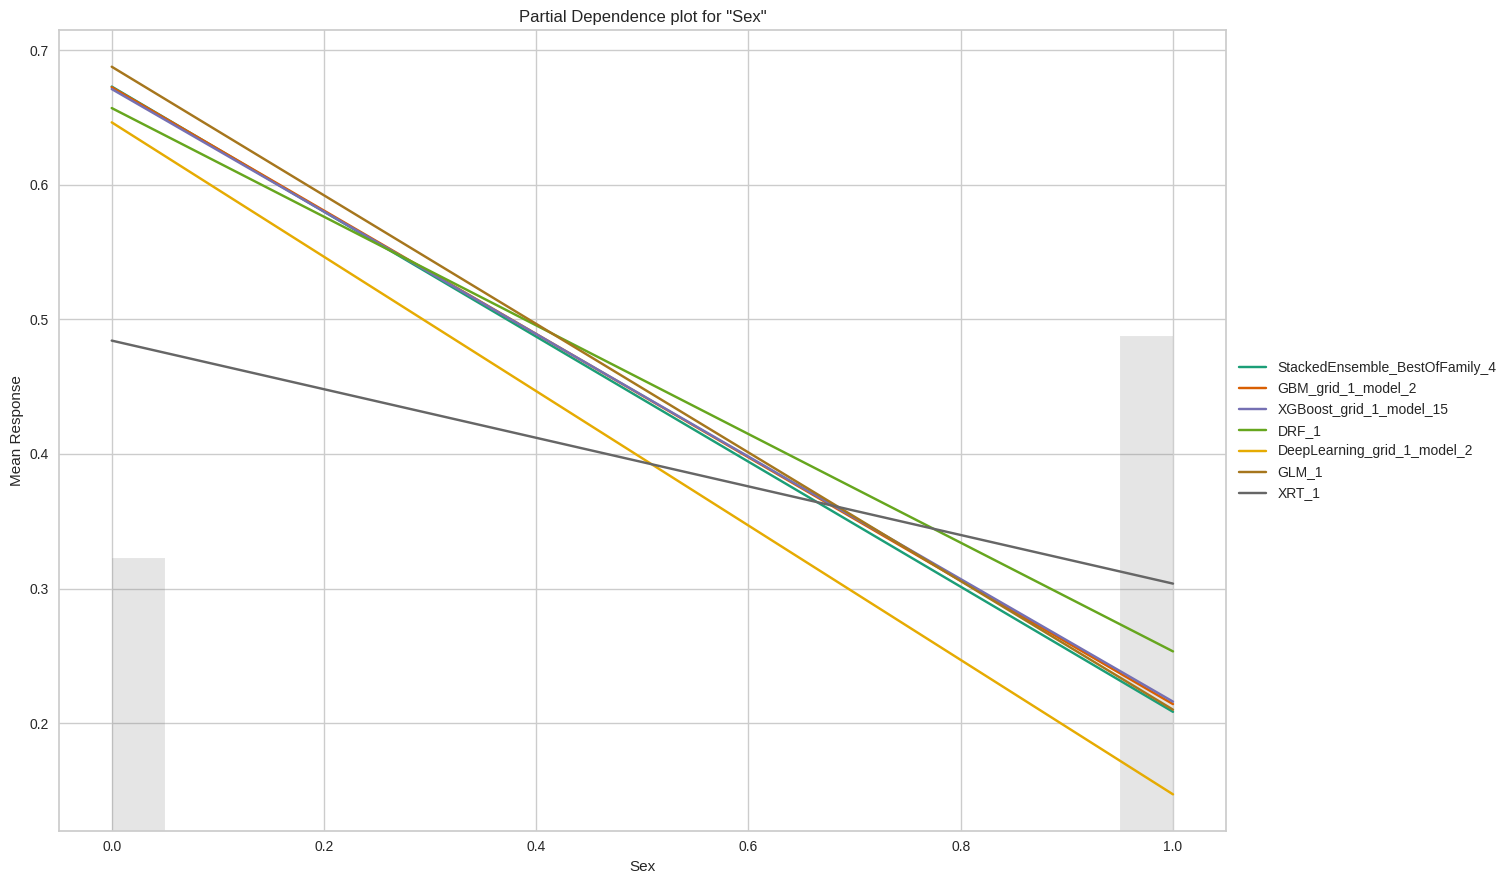

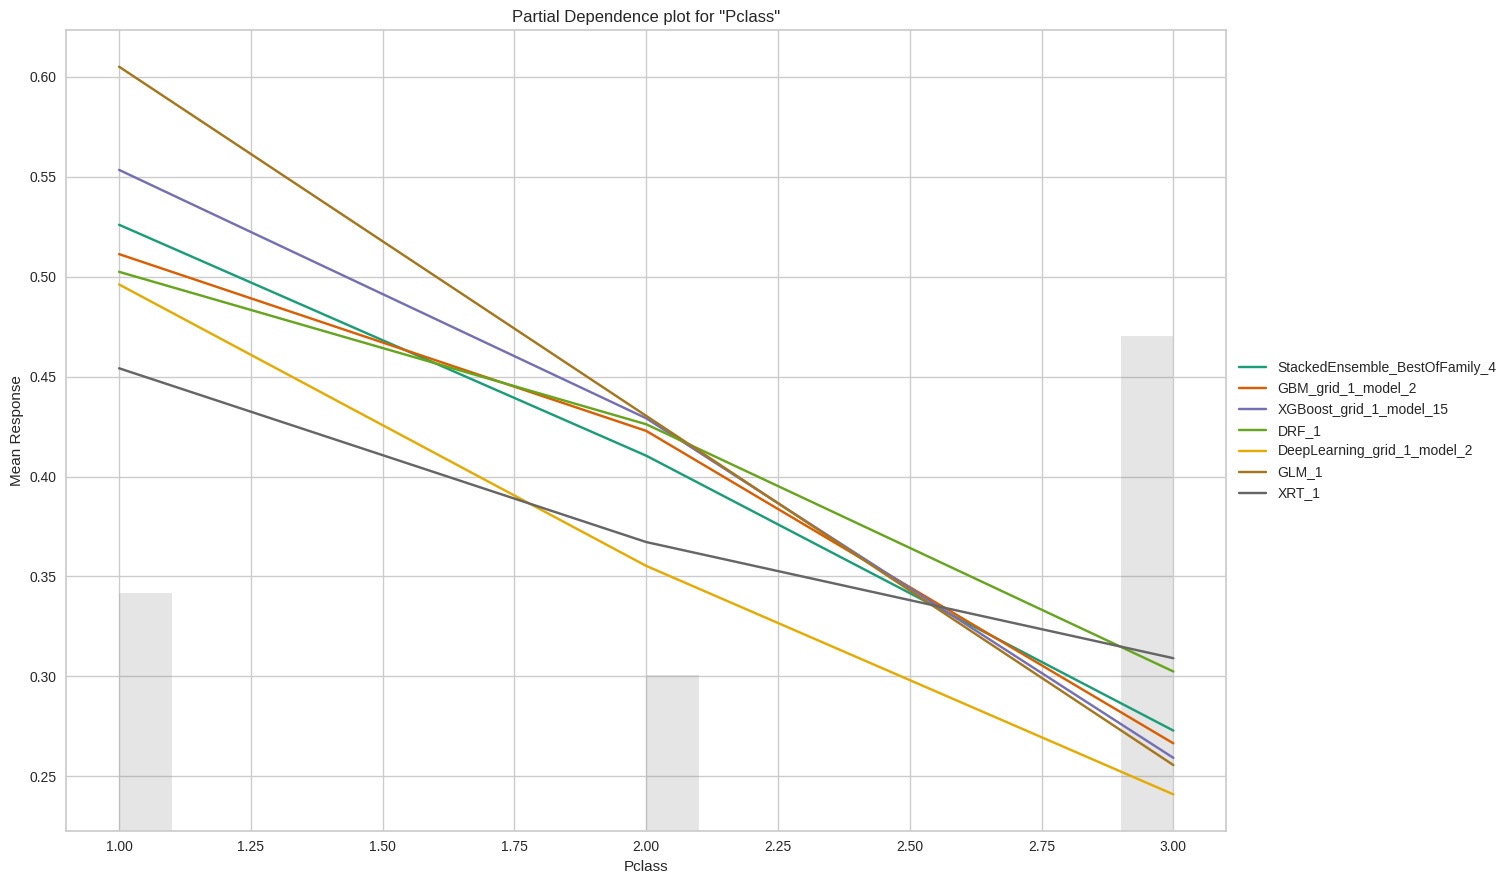

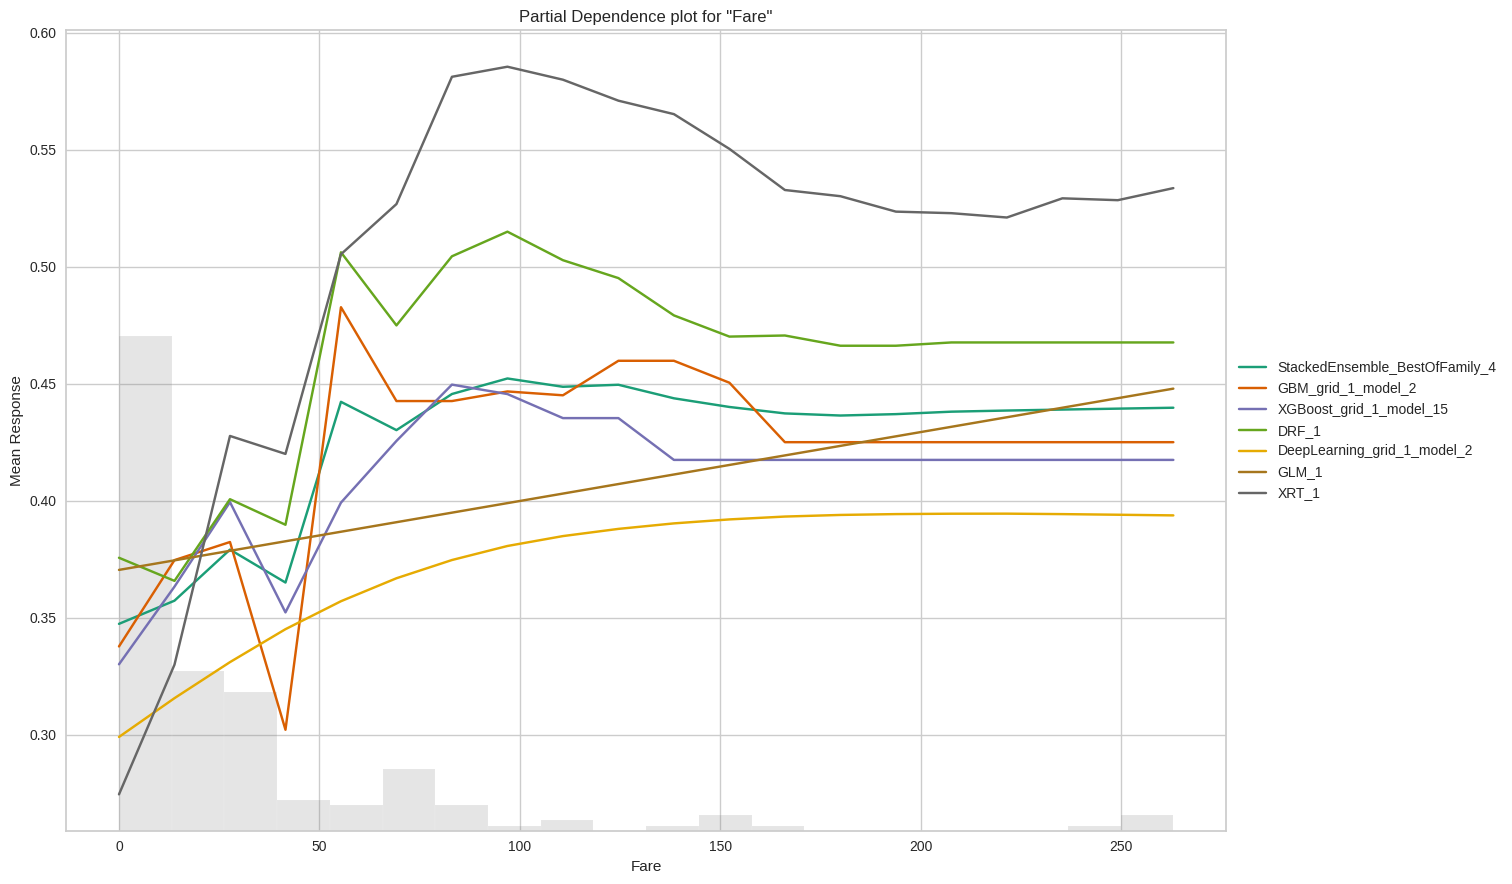

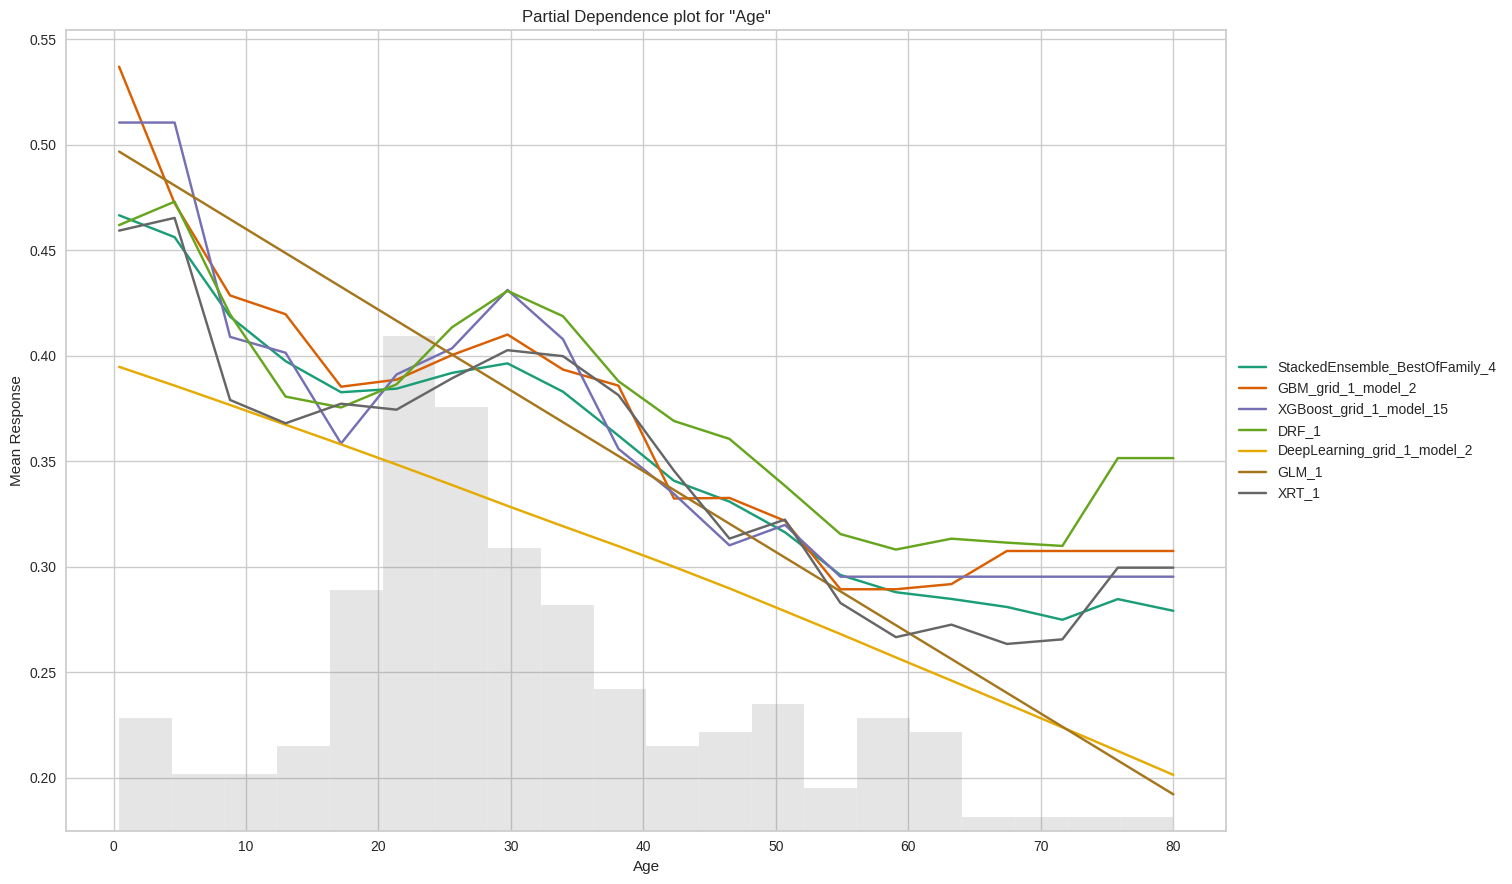

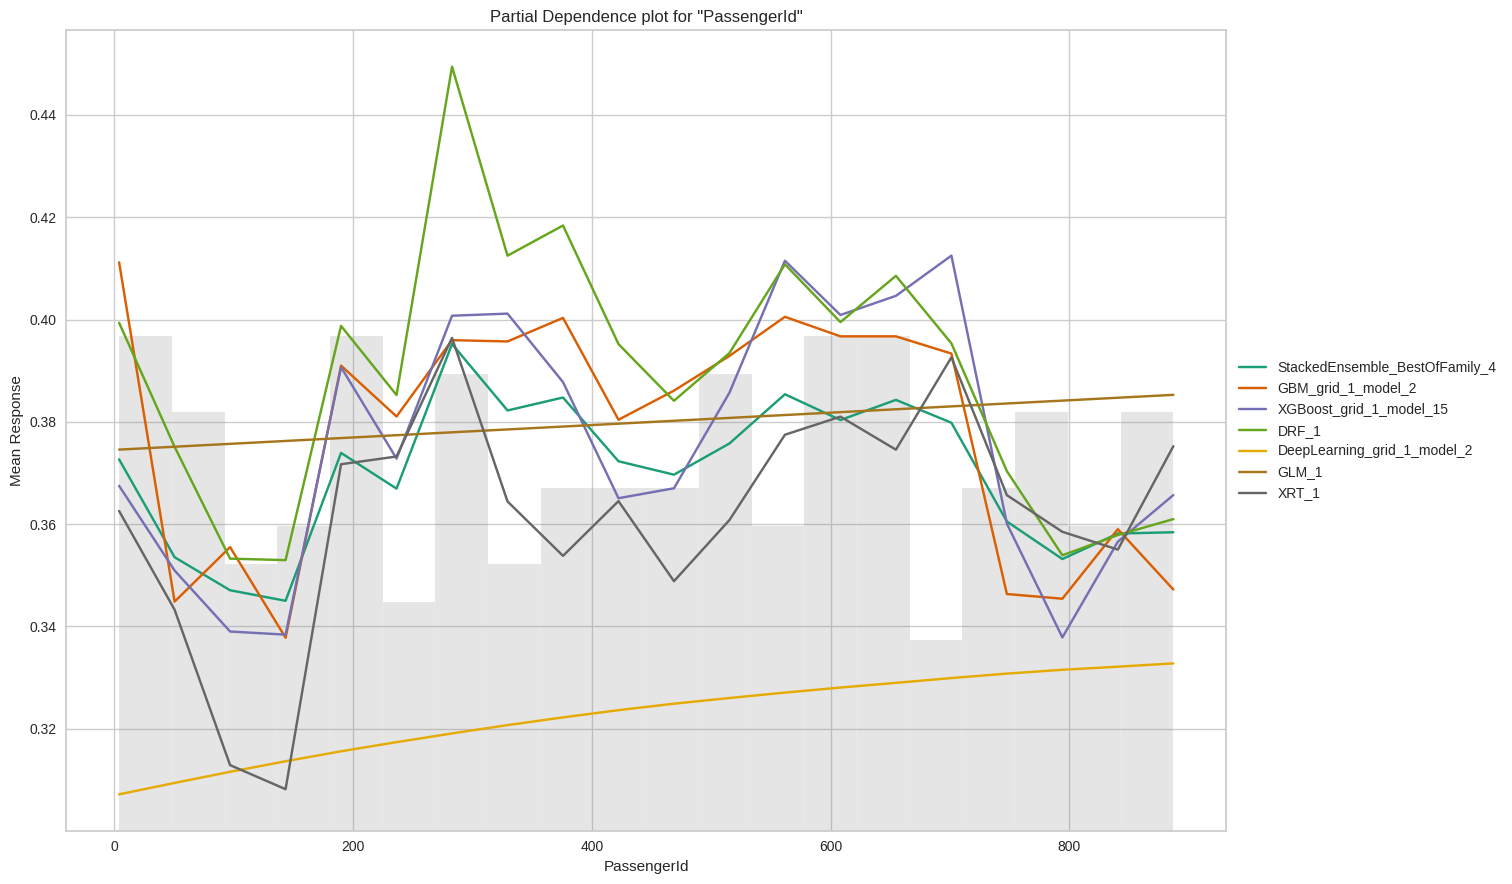

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

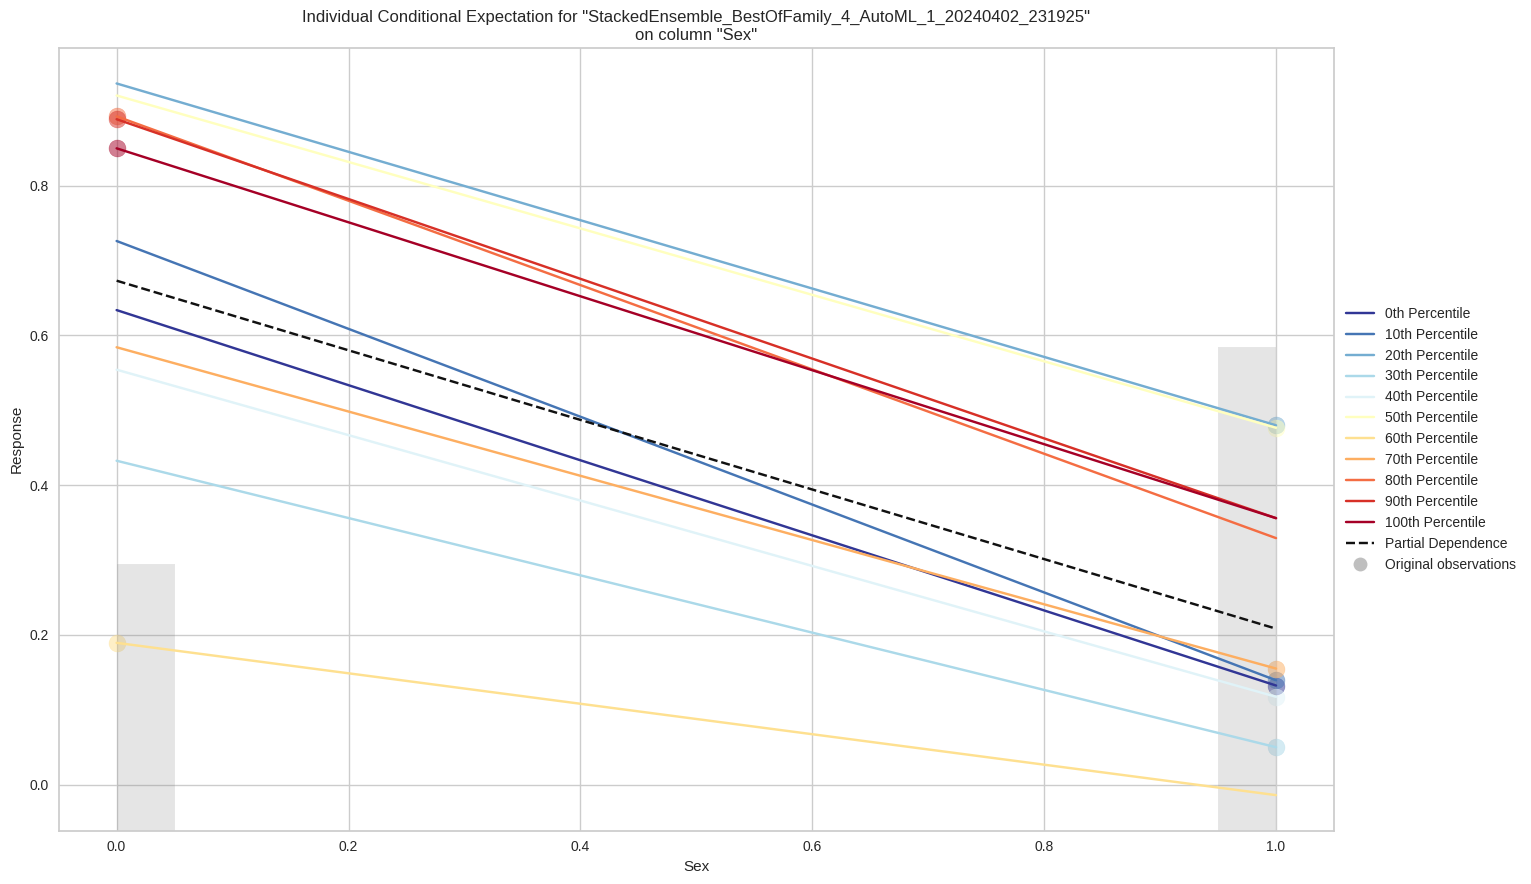

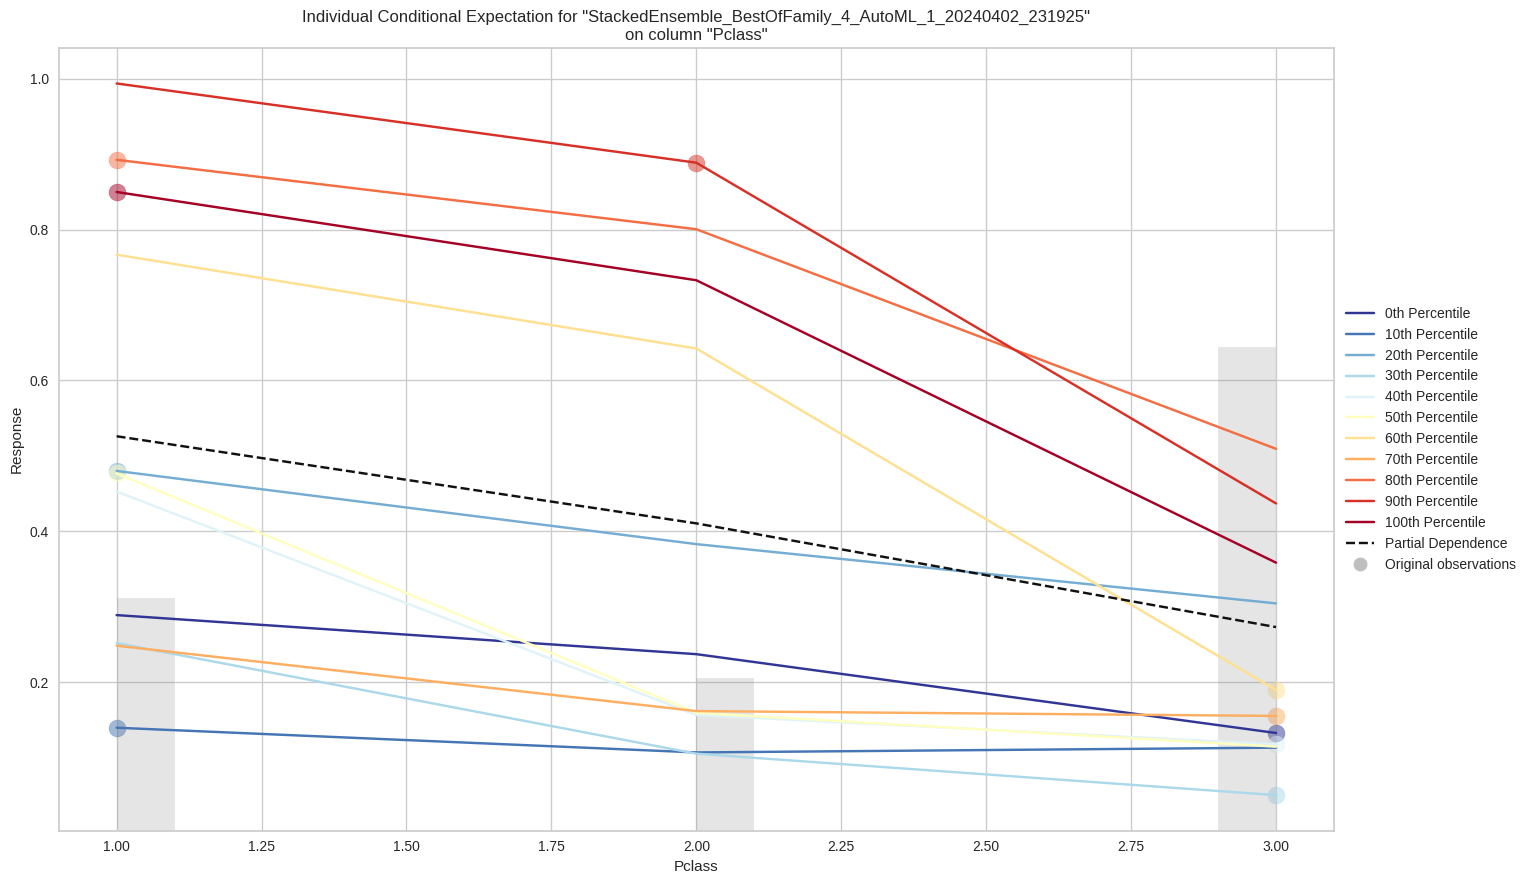

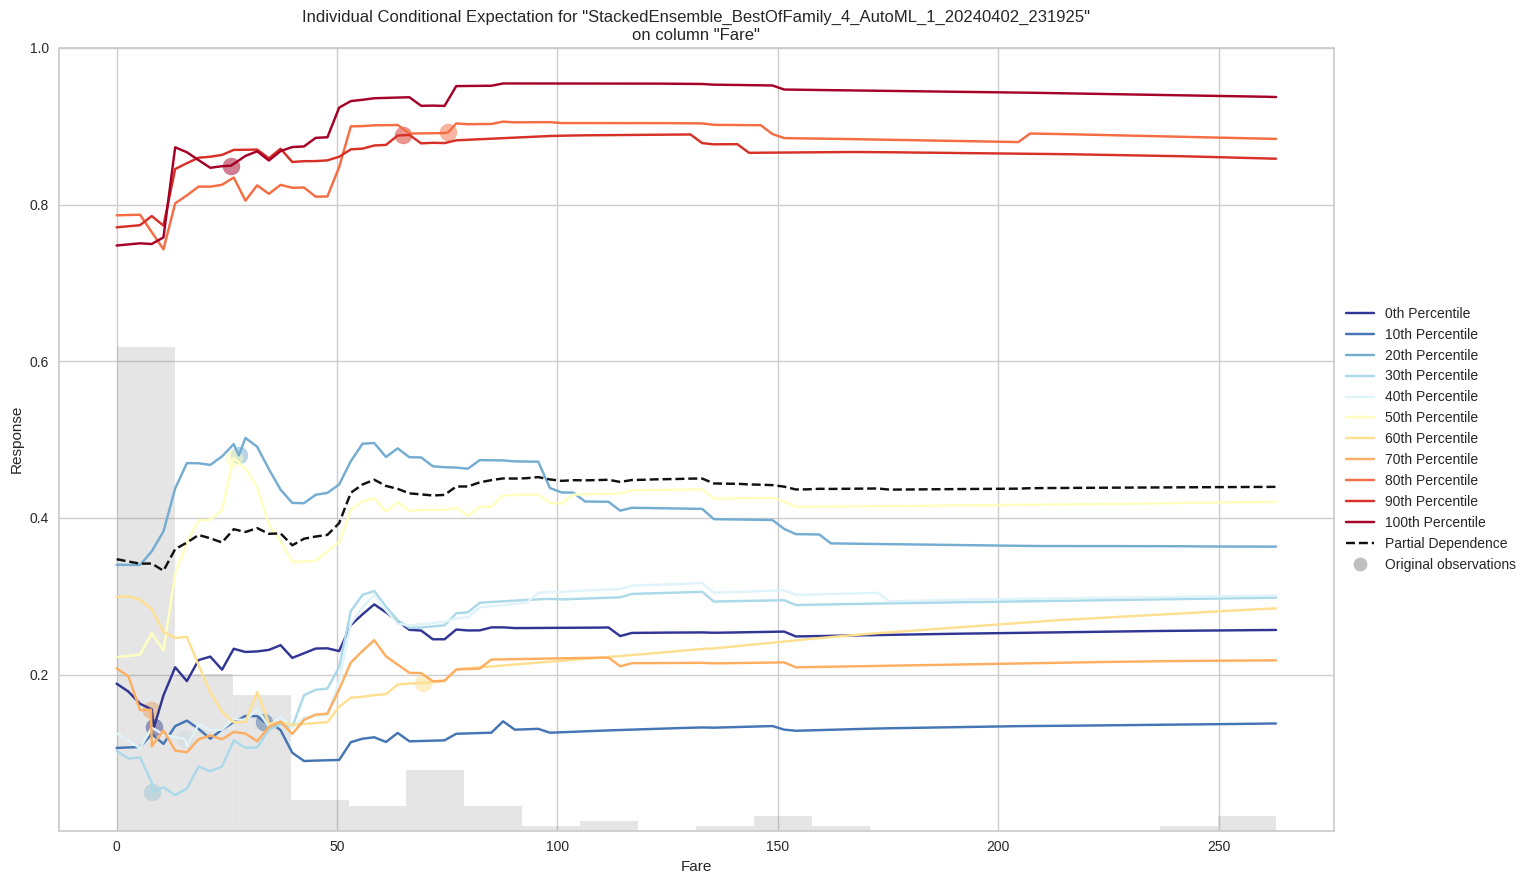

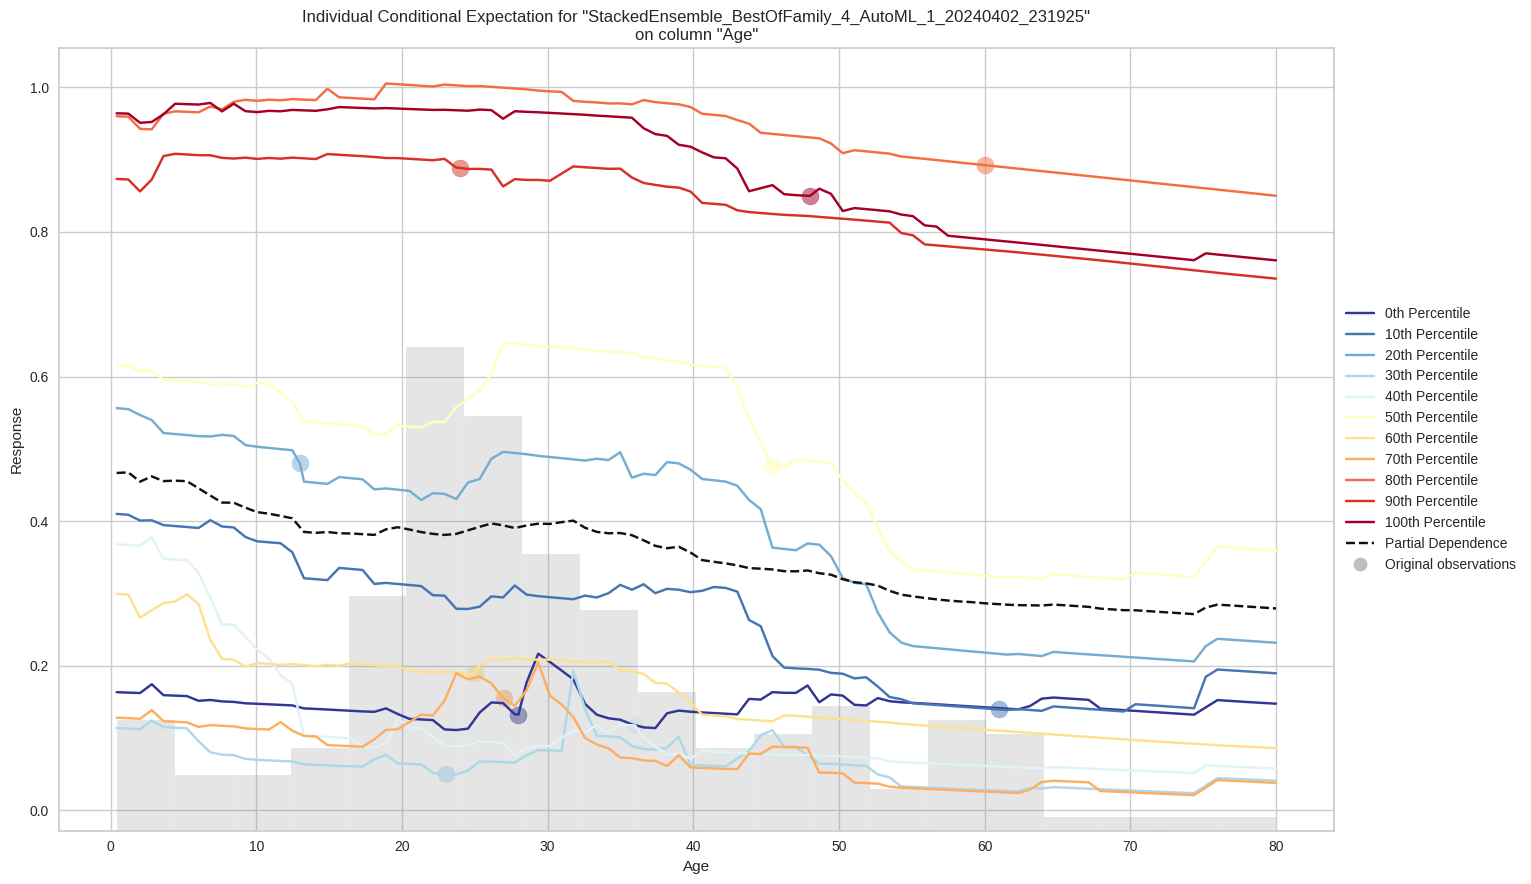

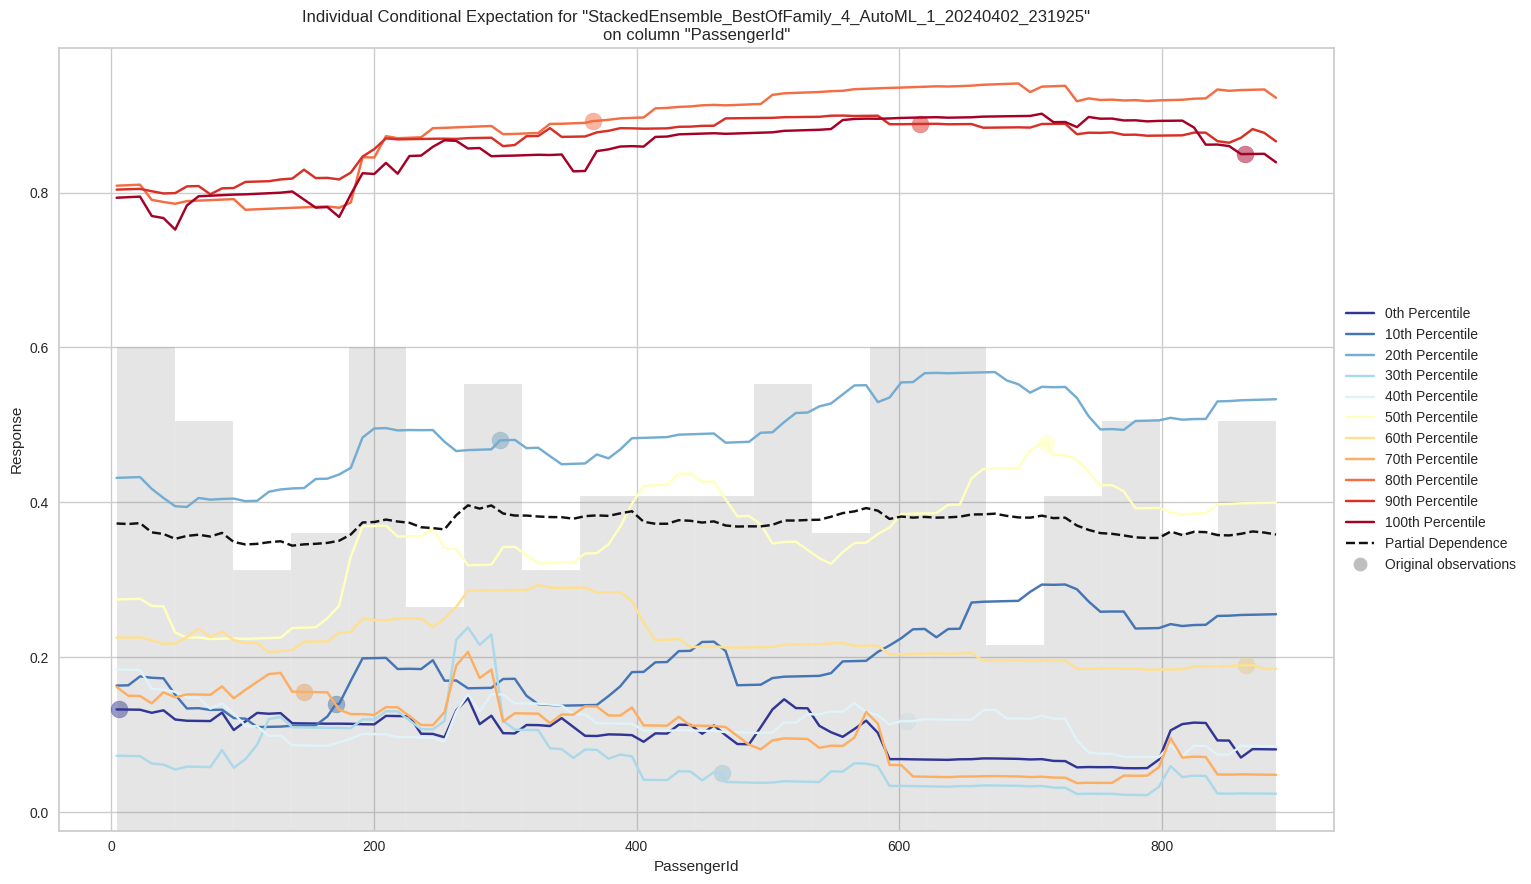

In [316]:
exa = aml.explain(df_test)

# Conclusion

The journey through machine learning, from data cleaning and feature selection to advanced predictive modeling with H2O AutoML and model interpretability analysis using SHAP values, showcases a comprehensive exploration of data science methodologies. The initial phase emphasizes the critical importance of preparing data effectively, setting a strong foundation for accurate and efficient machine learning models. Subsequently, the application of H2O AutoML for the Titanic dataset prediction illustrates the platform's ability to simplify the predictive modeling process, making advanced analytics accessible while underscoring the continued importance of expert-driven data preprocessing and understanding.

The exploration further into model construction and the application of SHAP analysis highlights the significance of choosing the right model and the power of interpretability in understanding the impact of features on predictions. The comparative analysis of models like GBM and Random Forest against their performance and interpretability through SHAP values underscores the delicate balance between accuracy, model complexity, and the clarity of insights derived from data.

In essence, these assignments collectively reveal the evolving nature of machine learning, from the foundational stages of data preparation to the nuanced applications of AutoML and the critical evaluation of model interpretability. This progression not only demonstrates the diverse capabilities of machine learning tools and techniques but also highlights the indispensable combination of automated solutions and human expertise in deriving meaningful insights from data.

# MIT LICENSE

In [317]:
url = 'https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/LICENSE'
license_text = requests.get(url).text
print(license_text)

MIT License

Copyright (c) 2024 Kunal Tibe

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTI